### In this Deep learning project, we are going to predict the price of houses based on different housing features through regression using keras.
###### Dataset is present in the same location as the notebook.

In [1]:
#importing Data Analysis and Exploratory libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
#reading our housing data
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### EDA and Visualization

In [4]:
#are there any null in our data? if so, how many? 
#isnull will return the null values as True and sum will count the Trues in that boolean mask
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
#common statistical values for each feature column
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


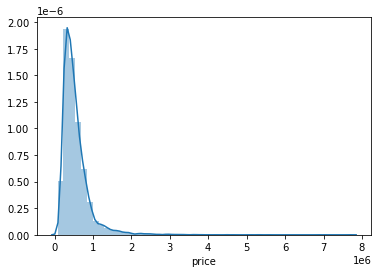

In [6]:
#distribution of price in the dataset
sns.distplot(df['price'])
#most of the houses are around 500000
#we also have few outliers between 3-8 million

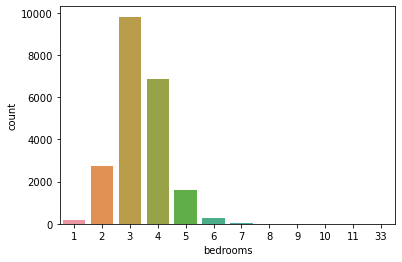

In [7]:
#counting the number of houses based on number of bedrooms.
#basically, a countplot is grouping based on the feature we give, i.e, bedroom in our case,
#and then plots the count of that.
sns.countplot(df['bedrooms'])
#majority of the houses have 3-4 bedrooms
#outliers with a very few houses have more than 6-7 rooms.

In [8]:
#let us see how does price correlates to other features in our dataset
#we apply corr() to get the correlation between features
#and then take the price to see it's correlation with other features
df.corr()['price'].sort_values()
#we can see our price looks more correlated to the sqft_living of the house
#this may mean that bigger the house, higher the price

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

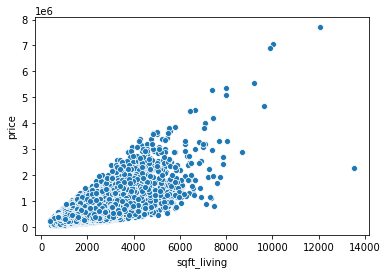

In [9]:
#let us plot and see graphically how correlated sqft_living is to the price
#scatterplot is basically plotting the x and y values and seeing how scattered they are
#a 45 degrees  straight linear line would bea perfect correlation
sns.scatterplot(x = 'sqft_living', y = 'price', data = df)
#from the plot, we can see that the shape is somehwat looking like a cone
#what this can be interpretted as, the price and sqft_living features are more correlated in the begining
#and gradually diverege and the values rise
#also, there are some outliers in the higher sqft_living

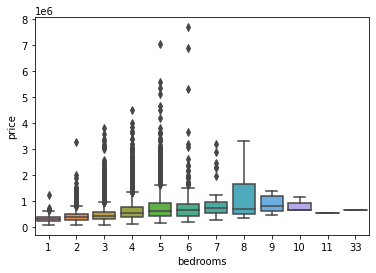

In [10]:
#let us plot a boxplot to see the distribution of bedrooms vs price
sns.boxplot(x = 'bedrooms', y = 'price', data = df)
#we can se outliers in price for most cases and some outliers in the number of bedrooms too. 

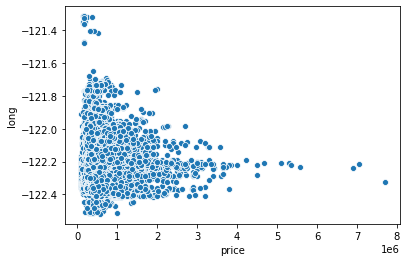

In [11]:
#let us plot longitude of the houses vs price as a scatter plot and check for any correaltion/pattern
sns.scatterplot(x = 'price', y = 'long', data = df)
#we can see that around -122.2 latitude, there is a spike in the prices of the houses
#would probably be a posh area

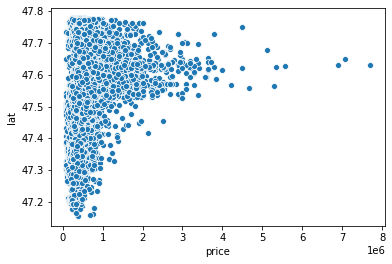

In [12]:
#similarly, let's plot the latitude position of the houses vs price
sns.scatterplot(x = 'price', y = 'lat', data = df)
#we see a similar scenario. Price spike around particular latitude of 47.6-47.7

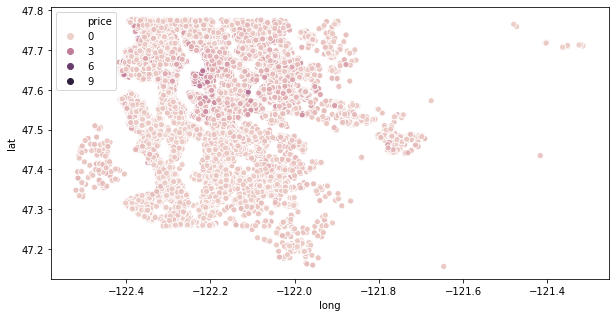

In [13]:
#plotting both latitude and longitude to see the price distribution
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'long', y='lat', data= df, hue = 'price')
#we can see a few high priced areas at the coordinates of the 47.7 and -122.2
#but there are a lot of outliers in our data, let us try removing them and then plot agaim

In [14]:
#sorting values based on price
df.sort_values('price', ascending=False).head(20)
#we see there are only a few houses with very high prices from around 4 million to 7 million

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [15]:
# 1% of the total number of the houses in our DF 
len(df) * 0.01
#approx 216

215.97

In [16]:
#let not take the top 1% of the houses based on their price
bottom_99_percent = df.sort_values('price', ascending= False).iloc[216:]

In [17]:
#now the top 1% are not taken into consideratation and the prices seem to be more consistent
bottom_99_percent.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,...,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868


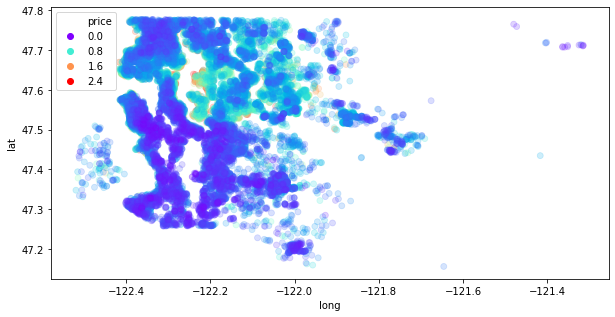

In [18]:
#let us plot these bottom 99% house prices on lat and long scatter plot
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'long', y='lat', data= bottom_99_percent, hue = 'price',
               edgecolor = None, alpha = 0.2, palette = 'rainbow')
#now it is bit more clear the higher prices around lat 47.6 and long -122.2

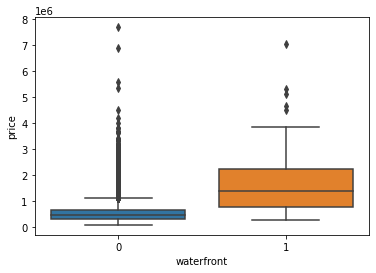

In [19]:
#plotting the price vs waterfront feature
sns.boxplot(x = 'waterfront', y = 'price', data = df)
#the average price of the houses with waterfront seems higher, 
#but we do have a lot of outliers for no waterfront houses too.

In [20]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [21]:
#dropping the ID column as it is toally random and does not make any sense as a feature for our NN
df = df.drop('id', axis = 1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Feature Extraction from Date variable

In [22]:
df['date']

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [23]:
#converting string date to datetime object using pd.to_datetime
df['date'] = pd.to_datetime(df['date'])

In [24]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [25]:
#after converting string date to datetime object, we can extract the year and the month from date
df['year'] = df['date'].apply(lambda date: date.year)

In [26]:
df['month'] = df['date'].apply(lambda date: date.month)

In [27]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


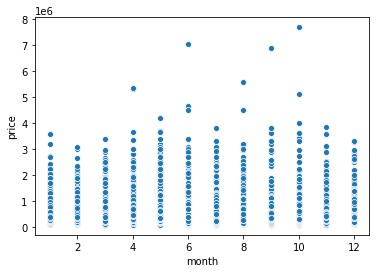

In [28]:
#plotting the price vs month scatter plot to see any pattern
sns.scatterplot(x = 'month', y = 'price', data = df)

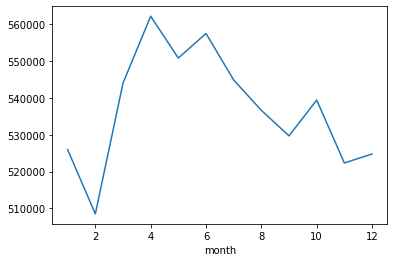

In [29]:
#plotting a distribution plot by grouping by month, taking mean price of ever month and plotting
df.groupby('month').mean()['price'].plot()
#we see a very small spike in the price in the month 4th month, noting major though

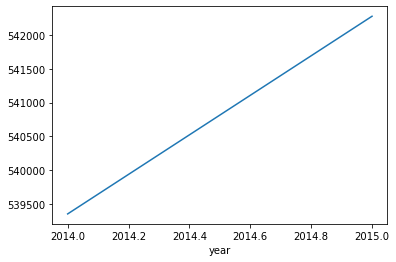

In [30]:
#let us plot year wise price
df.groupby('year').mean()['price'].plot()
#there is clearly a correlation, we can see that the price has increased with each increased year
#this is as expected due to infalation every year

In [31]:
#as we have extracted the month and the year from date, we can drop the date feature.
df = df.drop('date', axis = 1)

In [32]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [33]:
#the zipcodes are also totally random and mostly have no correlation with the price
df = df.drop('zipcode', axis = 1)

In [34]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [35]:
# 0 means the house has not been renovated
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

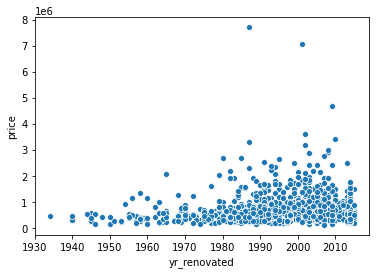

In [36]:
#excluding the value of yr_renovated = 0, we can the the more recent the renovation, 
#the higher is it's price.
sns.scatterplot(x = 'yr_renovated', y = 'price', data = df[df['yr_renovated'] != 0])
#we can think of it as 0 is the lowest values and the houses with no renovation. 
#also, these cost lesser than the ones with renovation

In [37]:
#similarly, we can think of sqft_basement as 0 is the lowest values and the houses with no basement 
#also, these cost lesser than the ones with basement
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [38]:
#defining our X and y as input features and labels respectively
X  = df.drop('price', axis =1).values
y = df['price'].values

### Train Test Split

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
#spliting our data in test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Scaling Data

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
#we are going to scale our features
scaler = MinMaxScaler()

In [43]:
#fitting the training input features and transforming them, both, in one step using fir_transform()
X_train = scaler.fit_transform(X_train)

In [44]:
#only scaling our test data on the model which was fir using training data.
#we do not fit the test data as it would perform data leakage
#we do not want to know naything about the test data, therefore we only scale it and not fit it.
X_test = scaler.transform(X_test)

### Creating NN and Adding layers

In [45]:
from tensorflow.keras.models import Sequential
#we set up a base sequential model and then keep adding layers to it
from tensorflow.keras.layers import Dense
#in this case we will simple add Dense layer
#Dense layer is where all neurons are connected to all the neurons in the next layer

In [46]:
#let's check the shape of the training
X_train.shape
#we have 19 input features

(15117, 19)

In [47]:
#first we create our Sequential model
model = Sequential()

#we can then keep adding Dense layers
#we provide the number of inputs and the chosen activation function to our Dense function
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))

#for our output layer, we only need one output neuron which is going to predict the continuous price
model.add(Dense(1))

##optimizer is essentially how you want to perform the gradient descent eg. Adam, rmsprop
#loss is how we want to calculate loss
#loss is diffently calculated, for eg.:
#multiclass classification - categorical_crossentropy, 
#binary classisfication - binary_crossentropy
#Linear regression - mse
model.compile(optimizer = 'adam', loss = 'mse')

In [48]:
#fitting our training data to the model
#we also pass our data to validation_data parameter.
#This will only calculate the loss on our test data as it is going to do for our training data, 
#so that we can have losses for both in one step.
#It is not going to use the test data for taining or fitting the model in any way.
model.fit(x = X_train, y = y_train, validation_data=(X_test, y_test),
         batch_size = 128, epochs = 3000)
#batch size is the number of input batch size we want our model to train on in one go and then take the next set of inputs
#epochs is the number of times we want our model to go over the training data to train the model
#we are taking random epoch of 3000 in this project
#loss is calculated on each epoch, i.e for each time our entire dataset is fitted to the model, 
#in our case, we are going to see losses calculated 2000 times, once for each epoch
#and it will calculated for both test and train set.
#Loss will be MSE as it is what we gave as the parameter value in the compile

Epoch 1/3000
119/119 [==============================] - 1s 5ms/step - loss: 412718432256.0000 - val_loss: 459801853952.0000
Epoch 2/3000
119/119 [==============================] - 0s 2ms/step - loss: 411720843264.0000 - val_loss: 456118665216.0000
Epoch 3/3000
119/119 [==============================] - 0s 3ms/step - loss: 397334118400.0000 - val_loss: 421352996864.0000
Epoch 4/3000
119/119 [==============================] - 0s 3ms/step - loss: 326838353920.0000 - val_loss: 300498255872.0000
Epoch 5/3000
119/119 [==============================] - 0s 2ms/step - loss: 183224336384.0000 - val_loss: 149778071552.0000
Epoch 6/3000
119/119 [==============================] - 0s 2ms/step - loss: 98970370048.0000 - val_loss: 117926944768.0000
Epoch 7/3000
119/119 [==============================] - 0s 2ms/step - loss: 90963279872.0000 - val_loss: 115501867008.0000
Epoch 8/3000
119/119 [==============================] - 0s 2ms/step - loss: 89487605760.0000 - val_loss: 113835786240.0000
Epoch 9/300

119/119 [==============================] - 0s 2ms/step - loss: 31119478784.0000 - val_loss: 36285292544.0000
Epoch 134/3000
119/119 [==============================] - 0s 2ms/step - loss: 31107491840.0000 - val_loss: 36214263808.0000
Epoch 135/3000
119/119 [==============================] - 0s 2ms/step - loss: 31069587456.0000 - val_loss: 36236537856.0000
Epoch 136/3000
119/119 [==============================] - 0s 2ms/step - loss: 31042123776.0000 - val_loss: 36312240128.0000
Epoch 137/3000
119/119 [==============================] - 0s 2ms/step - loss: 31019089920.0000 - val_loss: 36198338560.0000
Epoch 138/3000
119/119 [==============================] - 0s 2ms/step - loss: 31027140608.0000 - val_loss: 36042846208.0000
Epoch 139/3000
119/119 [==============================] - 0s 2ms/step - loss: 31004827648.0000 - val_loss: 36109078528.0000
Epoch 140/3000
119/119 [==============================] - 0s 2ms/step - loss: 30952116224.0000 - val_loss: 36098015232.0000
Epoch 141/3000
119/119 

Epoch 199/3000
119/119 [==============================] - 0s 2ms/step - loss: 29853861888.0000 - val_loss: 34257793024.0000
Epoch 200/3000
119/119 [==============================] - 0s 2ms/step - loss: 29885894656.0000 - val_loss: 34227568640.0000
Epoch 201/3000
119/119 [==============================] - 0s 2ms/step - loss: 29875044352.0000 - val_loss: 34315255808.0000
Epoch 202/3000
119/119 [==============================] - 0s 2ms/step - loss: 29854830592.0000 - val_loss: 34224955392.0000
Epoch 203/3000
119/119 [==============================] - 0s 2ms/step - loss: 29843615744.0000 - val_loss: 34173179904.0000
Epoch 204/3000
119/119 [==============================] - 0s 2ms/step - loss: 29793155072.0000 - val_loss: 34183438336.0000
Epoch 205/3000
119/119 [==============================] - 0s 2ms/step - loss: 29771618304.0000 - val_loss: 34047795200.0000
Epoch 206/3000
119/119 [==============================] - 0s 2ms/step - loss: 29756643328.0000 - val_loss: 34013198336.0000
Epoch 20

119/119 [==============================] - 0s 2ms/step - loss: 29119631360.0000 - val_loss: 32943435776.0000
Epoch 266/3000
119/119 [==============================] - 0s 2ms/step - loss: 29141977088.0000 - val_loss: 32868616192.0000
Epoch 267/3000
119/119 [==============================] - 0s 2ms/step - loss: 29095618560.0000 - val_loss: 32974581760.0000
Epoch 268/3000
119/119 [==============================] - 0s 2ms/step - loss: 29104025600.0000 - val_loss: 33006426112.0000
Epoch 269/3000
119/119 [==============================] - 0s 2ms/step - loss: 29078126592.0000 - val_loss: 32998115328.0000
Epoch 270/3000
119/119 [==============================] - 0s 2ms/step - loss: 29111060480.0000 - val_loss: 32932548608.0000
Epoch 271/3000
119/119 [==============================] - 0s 2ms/step - loss: 29079513088.0000 - val_loss: 32931704832.0000
Epoch 272/3000
119/119 [==============================] - 0s 2ms/step - loss: 29040484352.0000 - val_loss: 32906571776.0000
Epoch 273/3000
119/119 

Epoch 331/3000
119/119 [==============================] - 0s 2ms/step - loss: 28515354624.0000 - val_loss: 31894388736.0000
Epoch 332/3000
119/119 [==============================] - 0s 2ms/step - loss: 28497381376.0000 - val_loss: 32017045504.0000
Epoch 333/3000
119/119 [==============================] - 0s 2ms/step - loss: 28463448064.0000 - val_loss: 31997136896.0000
Epoch 334/3000
119/119 [==============================] - 0s 2ms/step - loss: 28454850560.0000 - val_loss: 31892832256.0000
Epoch 335/3000
119/119 [==============================] - 0s 2ms/step - loss: 28456851456.0000 - val_loss: 31909566464.0000
Epoch 336/3000
119/119 [==============================] - 0s 2ms/step - loss: 28442894336.0000 - val_loss: 31977963520.0000
Epoch 337/3000
119/119 [==============================] - 0s 2ms/step - loss: 28404668416.0000 - val_loss: 31882121216.0000
Epoch 338/3000
119/119 [==============================] - 0s 2ms/step - loss: 28442236928.0000 - val_loss: 31926398976.0000
Epoch 33

119/119 [==============================] - 0s 2ms/step - loss: 27934613504.0000 - val_loss: 31261827072.0000
Epoch 398/3000
119/119 [==============================] - 0s 2ms/step - loss: 27947786240.0000 - val_loss: 31233247232.0000
Epoch 399/3000
119/119 [==============================] - 0s 2ms/step - loss: 27929837568.0000 - val_loss: 31105900544.0000
Epoch 400/3000
119/119 [==============================] - 0s 2ms/step - loss: 27916503040.0000 - val_loss: 31107653632.0000
Epoch 401/3000
119/119 [==============================] - 0s 2ms/step - loss: 27922997248.0000 - val_loss: 31146594304.0000
Epoch 402/3000
119/119 [==============================] - 0s 2ms/step - loss: 27917715456.0000 - val_loss: 31098361856.0000
Epoch 403/3000
119/119 [==============================] - 0s 2ms/step - loss: 27894673408.0000 - val_loss: 31153412096.0000
Epoch 404/3000
119/119 [==============================] - 0s 2ms/step - loss: 27913218048.0000 - val_loss: 31133337600.0000
Epoch 405/3000
119/119 

119/119 [==============================] - 0s 2ms/step - loss: 26739339264.0000 - val_loss: 29917040640.0000
Epoch 529/3000
119/119 [==============================] - 0s 2ms/step - loss: 26758819840.0000 - val_loss: 29985273856.0000
Epoch 530/3000
119/119 [==============================] - 0s 2ms/step - loss: 26713565184.0000 - val_loss: 29931452416.0000
Epoch 531/3000
119/119 [==============================] - 0s 2ms/step - loss: 26722691072.0000 - val_loss: 29991725056.0000
Epoch 532/3000
119/119 [==============================] - 0s 2ms/step - loss: 26695133184.0000 - val_loss: 30102022144.0000
Epoch 533/3000
119/119 [==============================] - 0s 2ms/step - loss: 26717779968.0000 - val_loss: 29878310912.0000
Epoch 534/3000
119/119 [==============================] - 0s 2ms/step - loss: 26709751808.0000 - val_loss: 29904844800.0000
Epoch 535/3000
119/119 [==============================] - 0s 2ms/step - loss: 26682050560.0000 - val_loss: 29980237824.0000
Epoch 536/3000
119/119 

Epoch 660/3000
119/119 [==============================] - 0s 2ms/step - loss: 25793040384.0000 - val_loss: 29082458112.0000
Epoch 661/3000
119/119 [==============================] - 0s 2ms/step - loss: 25783023616.0000 - val_loss: 29152081920.0000
Epoch 662/3000
119/119 [==============================] - 0s 2ms/step - loss: 25802295296.0000 - val_loss: 29177325568.0000
Epoch 663/3000
119/119 [==============================] - 0s 2ms/step - loss: 25765289984.0000 - val_loss: 29207558144.0000
Epoch 664/3000
119/119 [==============================] - 0s 2ms/step - loss: 25742968832.0000 - val_loss: 29279410176.0000
Epoch 665/3000
119/119 [==============================] - 0s 2ms/step - loss: 25749512192.0000 - val_loss: 29229324288.0000
Epoch 666/3000
119/119 [==============================] - 0s 2ms/step - loss: 25750628352.0000 - val_loss: 29354856448.0000
Epoch 667/3000
119/119 [==============================] - 0s 2ms/step - loss: 25733369856.0000 - val_loss: 29147377664.0000
Epoch 66

119/119 [==============================] - 0s 2ms/step - loss: 25432750080.0000 - val_loss: 29421398016.0000
Epoch 727/3000
119/119 [==============================] - 0s 2ms/step - loss: 25480056832.0000 - val_loss: 29132128256.0000
Epoch 728/3000
119/119 [==============================] - 0s 2ms/step - loss: 25524770816.0000 - val_loss: 29220069376.0000
Epoch 729/3000
119/119 [==============================] - 0s 2ms/step - loss: 25456701440.0000 - val_loss: 29102020608.0000
Epoch 730/3000
119/119 [==============================] - 0s 2ms/step - loss: 25452636160.0000 - val_loss: 29110921216.0000
Epoch 731/3000
119/119 [==============================] - 0s 2ms/step - loss: 25459357696.0000 - val_loss: 28990216192.0000
Epoch 732/3000
119/119 [==============================] - 0s 2ms/step - loss: 25462255616.0000 - val_loss: 29174069248.0000
Epoch 733/3000
119/119 [==============================] - 0s 2ms/step - loss: 25418430464.0000 - val_loss: 29012934656.0000
Epoch 734/3000
119/119 

119/119 [==============================] - 0s 2ms/step - loss: 25016924160.0000 - val_loss: 29022681088.0000
Epoch 858/3000
119/119 [==============================] - 0s 2ms/step - loss: 25030080512.0000 - val_loss: 29110898688.0000
Epoch 859/3000
119/119 [==============================] - 0s 2ms/step - loss: 25071413248.0000 - val_loss: 29107449856.0000
Epoch 860/3000
119/119 [==============================] - 0s 2ms/step - loss: 24996642816.0000 - val_loss: 29066477568.0000
Epoch 861/3000
119/119 [==============================] - 0s 2ms/step - loss: 25021915136.0000 - val_loss: 29028833280.0000
Epoch 862/3000
119/119 [==============================] - 0s 2ms/step - loss: 24958699520.0000 - val_loss: 29303427072.0000
Epoch 863/3000
119/119 [==============================] - 0s 2ms/step - loss: 25003714560.0000 - val_loss: 29071790080.0000
Epoch 864/3000
119/119 [==============================] - 0s 2ms/step - loss: 25012889600.0000 - val_loss: 29093978112.0000
Epoch 865/3000
119/119 

119/119 [==============================] - 0s 2ms/step - loss: 24710268928.0000 - val_loss: 29067507712.0000
Epoch 990/3000
119/119 [==============================] - 0s 2ms/step - loss: 24671363072.0000 - val_loss: 28934123520.0000
Epoch 991/3000
119/119 [==============================] - 0s 2ms/step - loss: 24681105408.0000 - val_loss: 29059284992.0000
Epoch 992/3000
119/119 [==============================] - 0s 2ms/step - loss: 24723673088.0000 - val_loss: 29129576448.0000
Epoch 993/3000
119/119 [==============================] - 0s 2ms/step - loss: 24728952832.0000 - val_loss: 28976926720.0000
Epoch 994/3000
119/119 [==============================] - 0s 2ms/step - loss: 24742885376.0000 - val_loss: 29028433920.0000
Epoch 995/3000
119/119 [==============================] - 0s 2ms/step - loss: 24677777408.0000 - val_loss: 28980228096.0000
Epoch 996/3000
119/119 [==============================] - 0s 2ms/step - loss: 24678647808.0000 - val_loss: 29238519808.0000
Epoch 997/3000
119/119 

Epoch 1055/3000
119/119 [==============================] - 0s 2ms/step - loss: 24586921984.0000 - val_loss: 29138954240.0000
Epoch 1056/3000
119/119 [==============================] - 0s 2ms/step - loss: 24559540224.0000 - val_loss: 29055260672.0000
Epoch 1057/3000
119/119 [==============================] - 0s 2ms/step - loss: 24620265472.0000 - val_loss: 29010735104.0000
Epoch 1058/3000
119/119 [==============================] - 0s 2ms/step - loss: 24540919808.0000 - val_loss: 29264650240.0000
Epoch 1059/3000
119/119 [==============================] - 0s 2ms/step - loss: 24526718976.0000 - val_loss: 29075924992.0000
Epoch 1060/3000
119/119 [==============================] - 0s 2ms/step - loss: 24552462336.0000 - val_loss: 28930172928.0000
Epoch 1061/3000
119/119 [==============================] - 0s 2ms/step - loss: 24611749888.0000 - val_loss: 28900659200.0000
Epoch 1062/3000
119/119 [==============================] - 0s 2ms/step - loss: 24568297472.0000 - val_loss: 28938270720.0000


119/119 [==============================] - 0s 2ms/step - loss: 24281354240.0000 - val_loss: 28841719808.0000
Epoch 1186/3000
119/119 [==============================] - 0s 2ms/step - loss: 24245741568.0000 - val_loss: 28753170432.0000
Epoch 1187/3000
119/119 [==============================] - 0s 2ms/step - loss: 24229773312.0000 - val_loss: 28973778944.0000
Epoch 1188/3000
119/119 [==============================] - 0s 2ms/step - loss: 24236697600.0000 - val_loss: 28980633600.0000
Epoch 1189/3000
119/119 [==============================] - 0s 2ms/step - loss: 24226838528.0000 - val_loss: 28924819456.0000
Epoch 1190/3000
119/119 [==============================] - 0s 2ms/step - loss: 24252491776.0000 - val_loss: 28840517632.0000
Epoch 1191/3000
119/119 [==============================] - 0s 2ms/step - loss: 24208459776.0000 - val_loss: 28833107968.0000
Epoch 1192/3000
119/119 [==============================] - 0s 2ms/step - loss: 24234209280.0000 - val_loss: 28870230016.0000
Epoch 1193/3000


119/119 [==============================] - 0s 2ms/step - loss: 23934181376.0000 - val_loss: 28573784064.0000
Epoch 1316/3000
119/119 [==============================] - 0s 2ms/step - loss: 23947083776.0000 - val_loss: 28626665472.0000
Epoch 1317/3000
119/119 [==============================] - 0s 2ms/step - loss: 23949869056.0000 - val_loss: 28861689856.0000
Epoch 1318/3000
119/119 [==============================] - 0s 2ms/step - loss: 23945136128.0000 - val_loss: 28614721536.0000
Epoch 1319/3000
119/119 [==============================] - 0s 2ms/step - loss: 23951296512.0000 - val_loss: 28814938112.0000
Epoch 1320/3000
119/119 [==============================] - 0s 2ms/step - loss: 23960639488.0000 - val_loss: 28782262272.0000
Epoch 1321/3000
119/119 [==============================] - 0s 2ms/step - loss: 23948779520.0000 - val_loss: 28679178240.0000
Epoch 1322/3000
119/119 [==============================] - 0s 2ms/step - loss: 23906416640.0000 - val_loss: 28951592960.0000
Epoch 1323/3000


119/119 [==============================] - 0s 2ms/step - loss: 23722412032.0000 - val_loss: 28720715776.0000
Epoch 1446/3000
119/119 [==============================] - 0s 2ms/step - loss: 23734908928.0000 - val_loss: 28873189376.0000
Epoch 1447/3000
119/119 [==============================] - 0s 2ms/step - loss: 23733837824.0000 - val_loss: 28878080000.0000
Epoch 1448/3000
119/119 [==============================] - 0s 2ms/step - loss: 23756578816.0000 - val_loss: 28801355776.0000
Epoch 1449/3000
119/119 [==============================] - 0s 2ms/step - loss: 23670228992.0000 - val_loss: 28614385664.0000
Epoch 1450/3000
119/119 [==============================] - 0s 2ms/step - loss: 23683170304.0000 - val_loss: 28736702464.0000
Epoch 1451/3000
119/119 [==============================] - 0s 2ms/step - loss: 23686557696.0000 - val_loss: 28765067264.0000
Epoch 1452/3000
119/119 [==============================] - 0s 2ms/step - loss: 23726477312.0000 - val_loss: 28636882944.0000
Epoch 1453/3000


119/119 [==============================] - 0s 2ms/step - loss: 23477807104.0000 - val_loss: 28556435456.0000
Epoch 1576/3000
119/119 [==============================] - 0s 2ms/step - loss: 23522105344.0000 - val_loss: 28592324608.0000
Epoch 1577/3000
119/119 [==============================] - 0s 2ms/step - loss: 23483553792.0000 - val_loss: 28533624832.0000
Epoch 1578/3000
119/119 [==============================] - 0s 2ms/step - loss: 23522922496.0000 - val_loss: 28565737472.0000
Epoch 1579/3000
119/119 [==============================] - 0s 2ms/step - loss: 23517857792.0000 - val_loss: 28877496320.0000
Epoch 1580/3000
119/119 [==============================] - 0s 2ms/step - loss: 23575261184.0000 - val_loss: 28670226432.0000
Epoch 1581/3000
119/119 [==============================] - 0s 2ms/step - loss: 23519014912.0000 - val_loss: 28654829568.0000
Epoch 1582/3000
119/119 [==============================] - 0s 2ms/step - loss: 23493185536.0000 - val_loss: 28551344128.0000
Epoch 1583/3000


119/119 [==============================] - 0s 2ms/step - loss: 23351504896.0000 - val_loss: 28373094400.0000
Epoch 1706/3000
119/119 [==============================] - 0s 2ms/step - loss: 23305560064.0000 - val_loss: 28612845568.0000
Epoch 1707/3000
119/119 [==============================] - 0s 2ms/step - loss: 23286706176.0000 - val_loss: 28621705216.0000
Epoch 1708/3000
119/119 [==============================] - 0s 2ms/step - loss: 23267129344.0000 - val_loss: 28619732992.0000
Epoch 1709/3000
119/119 [==============================] - 0s 2ms/step - loss: 23299848192.0000 - val_loss: 28555595776.0000
Epoch 1710/3000
119/119 [==============================] - 0s 2ms/step - loss: 23279142912.0000 - val_loss: 28421531648.0000
Epoch 1711/3000
119/119 [==============================] - 0s 2ms/step - loss: 23302385664.0000 - val_loss: 28499253248.0000
Epoch 1712/3000
119/119 [==============================] - 0s 2ms/step - loss: 23273881600.0000 - val_loss: 28605145088.0000
Epoch 1713/3000


119/119 [==============================] - 0s 2ms/step - loss: 20714950656.0000 - val_loss: 25449627648.0000
Epoch 1836/3000
119/119 [==============================] - 0s 2ms/step - loss: 20688136192.0000 - val_loss: 25343834112.0000
Epoch 1837/3000
119/119 [==============================] - 0s 2ms/step - loss: 20708478976.0000 - val_loss: 25151803392.0000
Epoch 1838/3000
119/119 [==============================] - 0s 2ms/step - loss: 20560277504.0000 - val_loss: 25559705600.0000
Epoch 1839/3000
119/119 [==============================] - 0s 2ms/step - loss: 20555522048.0000 - val_loss: 25099917312.0000
Epoch 1840/3000
119/119 [==============================] - 0s 2ms/step - loss: 20693850112.0000 - val_loss: 25005858816.0000
Epoch 1841/3000
119/119 [==============================] - 0s 2ms/step - loss: 20501432320.0000 - val_loss: 25086478336.0000
Epoch 1842/3000
119/119 [==============================] - 0s 2ms/step - loss: 20455301120.0000 - val_loss: 25063487488.0000
Epoch 1843/3000


119/119 [==============================] - 0s 2ms/step - loss: 17576167424.0000 - val_loss: 21977171968.0000
Epoch 1966/3000
119/119 [==============================] - 0s 2ms/step - loss: 17610113024.0000 - val_loss: 22076721152.0000
Epoch 1967/3000
119/119 [==============================] - 0s 2ms/step - loss: 17558243328.0000 - val_loss: 22072414208.0000
Epoch 1968/3000
119/119 [==============================] - 0s 2ms/step - loss: 17548060672.0000 - val_loss: 21852825600.0000
Epoch 1969/3000
119/119 [==============================] - 0s 2ms/step - loss: 17468649472.0000 - val_loss: 21865609216.0000
Epoch 1970/3000
119/119 [==============================] - 0s 2ms/step - loss: 17490110464.0000 - val_loss: 21690746880.0000
Epoch 1971/3000
119/119 [==============================] - 0s 2ms/step - loss: 17452920832.0000 - val_loss: 21906792448.0000
Epoch 1972/3000
119/119 [==============================] - 0s 2ms/step - loss: 17526339584.0000 - val_loss: 22068078592.0000
Epoch 1973/3000


119/119 [==============================] - 0s 2ms/step - loss: 15903969280.0000 - val_loss: 20528107520.0000
Epoch 2096/3000
119/119 [==============================] - 0s 2ms/step - loss: 15889573888.0000 - val_loss: 20220854272.0000
Epoch 2097/3000
119/119 [==============================] - 0s 2ms/step - loss: 15868863488.0000 - val_loss: 20399722496.0000
Epoch 2098/3000
119/119 [==============================] - 0s 2ms/step - loss: 15935064064.0000 - val_loss: 20147957760.0000
Epoch 2099/3000
119/119 [==============================] - 0s 2ms/step - loss: 15806879744.0000 - val_loss: 20284665856.0000
Epoch 2100/3000
119/119 [==============================] - 0s 2ms/step - loss: 15841038336.0000 - val_loss: 20290009088.0000
Epoch 2101/3000
119/119 [==============================] - 0s 2ms/step - loss: 15848898560.0000 - val_loss: 20206782464.0000
Epoch 2102/3000
119/119 [==============================] - 0s 2ms/step - loss: 15845609472.0000 - val_loss: 20149456896.0000
Epoch 2103/3000


119/119 [==============================] - 0s 2ms/step - loss: 14533191680.0000 - val_loss: 19171635200.0000
Epoch 2226/3000
119/119 [==============================] - 0s 2ms/step - loss: 14504670208.0000 - val_loss: 18988318720.0000
Epoch 2227/3000
119/119 [==============================] - 0s 2ms/step - loss: 14571798528.0000 - val_loss: 18995544064.0000
Epoch 2228/3000
119/119 [==============================] - 0s 2ms/step - loss: 14484134912.0000 - val_loss: 18995195904.0000
Epoch 2229/3000
119/119 [==============================] - 0s 2ms/step - loss: 14502252544.0000 - val_loss: 18941134848.0000
Epoch 2230/3000
119/119 [==============================] - 0s 2ms/step - loss: 14475518976.0000 - val_loss: 19164534784.0000
Epoch 2231/3000
119/119 [==============================] - 0s 2ms/step - loss: 14536364032.0000 - val_loss: 19128248320.0000
Epoch 2232/3000
119/119 [==============================] - 0s 2ms/step - loss: 14485996544.0000 - val_loss: 18975842304.0000
Epoch 2233/3000


119/119 [==============================] - 0s 2ms/step - loss: 13613389824.0000 - val_loss: 18528989184.0000
Epoch 2356/3000
119/119 [==============================] - 0s 2ms/step - loss: 13572958208.0000 - val_loss: 18347362304.0000
Epoch 2357/3000
119/119 [==============================] - 0s 2ms/step - loss: 13650601984.0000 - val_loss: 18474960896.0000
Epoch 2358/3000
119/119 [==============================] - 0s 2ms/step - loss: 13567350784.0000 - val_loss: 18473971712.0000
Epoch 2359/3000
119/119 [==============================] - 0s 2ms/step - loss: 13518211072.0000 - val_loss: 18306396160.0000
Epoch 2360/3000
119/119 [==============================] - 0s 2ms/step - loss: 13498613760.0000 - val_loss: 18582007808.0000
Epoch 2361/3000
119/119 [==============================] - 0s 2ms/step - loss: 13604754432.0000 - val_loss: 18309892096.0000
Epoch 2362/3000
119/119 [==============================] - 0s 2ms/step - loss: 13512782848.0000 - val_loss: 18290169856.0000
Epoch 2363/3000


119/119 [==============================] - 0s 2ms/step - loss: 12955679744.0000 - val_loss: 17865762816.0000
Epoch 2486/3000
119/119 [==============================] - 0s 2ms/step - loss: 12952402944.0000 - val_loss: 18041430016.0000
Epoch 2487/3000
119/119 [==============================] - 0s 2ms/step - loss: 12934422528.0000 - val_loss: 18209202176.0000
Epoch 2488/3000
119/119 [==============================] - 0s 2ms/step - loss: 12950829056.0000 - val_loss: 17866919936.0000
Epoch 2489/3000
119/119 [==============================] - 0s 2ms/step - loss: 12956877824.0000 - val_loss: 17849759744.0000
Epoch 2490/3000
119/119 [==============================] - 0s 2ms/step - loss: 12968235008.0000 - val_loss: 17731997696.0000
Epoch 2491/3000
119/119 [==============================] - 0s 2ms/step - loss: 13034693632.0000 - val_loss: 18110697472.0000
Epoch 2492/3000
119/119 [==============================] - 0s 2ms/step - loss: 12957140992.0000 - val_loss: 17804924928.0000
Epoch 2493/3000


119/119 [==============================] - 0s 2ms/step - loss: 12649879552.0000 - val_loss: 17588889600.0000
Epoch 2616/3000
119/119 [==============================] - 0s 2ms/step - loss: 12586206208.0000 - val_loss: 17727895552.0000
Epoch 2617/3000
119/119 [==============================] - 0s 2ms/step - loss: 12621348864.0000 - val_loss: 17658775552.0000
Epoch 2618/3000
119/119 [==============================] - 0s 2ms/step - loss: 12575076352.0000 - val_loss: 17669627904.0000
Epoch 2619/3000
119/119 [==============================] - 0s 2ms/step - loss: 12579902464.0000 - val_loss: 17675751424.0000
Epoch 2620/3000
119/119 [==============================] - 0s 2ms/step - loss: 12559084544.0000 - val_loss: 17678354432.0000
Epoch 2621/3000
119/119 [==============================] - 0s 2ms/step - loss: 12548876288.0000 - val_loss: 17558833152.0000
Epoch 2622/3000
119/119 [==============================] - 0s 2ms/step - loss: 12654401536.0000 - val_loss: 17614186496.0000
Epoch 2623/3000


119/119 [==============================] - 0s 2ms/step - loss: 12346967040.0000 - val_loss: 17395789824.0000
Epoch 2746/3000
119/119 [==============================] - 0s 2ms/step - loss: 12371894272.0000 - val_loss: 17433663488.0000
Epoch 2747/3000
119/119 [==============================] - 0s 2ms/step - loss: 12344173568.0000 - val_loss: 17477220352.0000
Epoch 2748/3000
119/119 [==============================] - 0s 2ms/step - loss: 12338735104.0000 - val_loss: 17461143552.0000
Epoch 2749/3000
119/119 [==============================] - 0s 2ms/step - loss: 12320229376.0000 - val_loss: 17958205440.0000
Epoch 2750/3000
119/119 [==============================] - 0s 2ms/step - loss: 12479327232.0000 - val_loss: 17422690304.0000
Epoch 2751/3000
119/119 [==============================] - 0s 2ms/step - loss: 12364055552.0000 - val_loss: 17385789440.0000
Epoch 2752/3000
119/119 [==============================] - 0s 2ms/step - loss: 12301407232.0000 - val_loss: 17378654208.0000
Epoch 2753/3000


119/119 [==============================] - 0s 2ms/step - loss: 12106718208.0000 - val_loss: 17619009536.0000
Epoch 2876/3000
119/119 [==============================] - 0s 2ms/step - loss: 12139587584.0000 - val_loss: 17467607040.0000
Epoch 2877/3000
119/119 [==============================] - 0s 2ms/step - loss: 12103209984.0000 - val_loss: 17411178496.0000
Epoch 2878/3000
119/119 [==============================] - 0s 2ms/step - loss: 12125931520.0000 - val_loss: 17501614080.0000
Epoch 2879/3000
119/119 [==============================] - 0s 2ms/step - loss: 12093483008.0000 - val_loss: 17534875648.0000
Epoch 2880/3000
119/119 [==============================] - 0s 2ms/step - loss: 12087931904.0000 - val_loss: 17527390208.0000
Epoch 2881/3000
119/119 [==============================] - 0s 2ms/step - loss: 12101076992.0000 - val_loss: 17371613184.0000
Epoch 2882/3000
119/119 [==============================] - 0s 2ms/step - loss: 12145977344.0000 - val_loss: 17323917312.0000
Epoch 2883/3000


### Performance Evaluation

In [49]:
#model.history.history stores the losses, we will have both the training data loss and the validation data loss
losses = pd.DataFrame(model.history.history)

In [50]:
losses.head()

,loss,val_loss
0,4.127184e+11,4.598019e+11
1,4.117208e+11,4.561187e+11
2,3.973341e+11,4.213530e+11
3,3.268384e+11,3.004983e+11
4,1.832243e+11,1.497781e+11


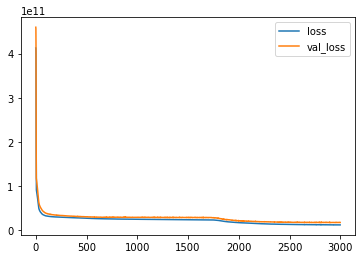

In [51]:
#lets plot the losses
losses.plot()
#we can see the loss for both train and test data are decresing similarly.
#This means there no overfitting of the model yet, 
#and we can still go further to reduce the error further although it will be very less.
#Overfit would be when the validation loss(orange line) starts to go up after a certain values and
#our training loss keeps on getting down.
#Overfit means, the model is able to predcit nicely on the training data data but is performing worse
#on the test(unseen) data as it's loss is incresing.

In [52]:
#error calculation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [53]:
#prediction for our test data
preds = model.predict(X_test)

In [54]:
#MSE of the test data
mean_squared_error(y_test, preds)

17458760903.219475

In [55]:
#RMSE of the test data
np.sqrt(mean_squared_error(y_test, preds))

132131.60448287713

In [56]:
#MAE
mean_absolute_error(y_test, preds)

76543.29082513503

In [57]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [58]:
#our mean price of the houses is 540000
5.402966e+05
#and our model is giving MAE of 102862

540296.6

In [59]:
#Explained variance regression score measures the performance of our model
#by giving a vlaue between 0 and 1, where, best possible score is 1.0, lower values are worse.
explained_variance_score(y_test, preds)

0.8890958884905711

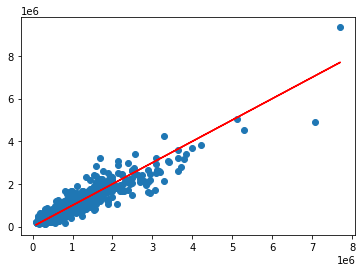

In [60]:
#plotting the test data predictions and the actual values
plt.scatter(y_test, preds)
plt.plot(y_test,y_test, 'r')
# we can see our plot to be more like a cone shaped. 
#This may be due to the outliers in our dataset which do not fit very well.

In [61]:
#taking the first house features as a sample house with features to predict it's value
test_house = df.drop('price', axis = 1).iloc[0]
test_house

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [62]:
print(test_house)
print(test_house.shape)

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64
(19,)


In [63]:
#reshaping the series values
#-1 deduces that dimension automatically from the original list/array
test_house.values.reshape(-1,19)

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01]])

In [64]:
#scaling the features
test_house = scaler.transform(test_house.values.reshape(-1,19))

In [65]:
#predicting the sample house price
model.predict(test_house)

array([[242816.75]], dtype=float32)

## Now let us fit and train the model on the bottom 99% to see if we see performance difference

In [66]:
#Data Processing
bottom_99_percent = bottom_99_percent.drop('id', axis = 1)
bottom_99_percent['date'] = pd.to_datetime(bottom_99_percent['date'])
bottom_99_percent['year'] = bottom_99_percent['date'].apply(lambda date: date.year)
bottom_99_percent['month'] = bottom_99_percent['date'].apply(lambda date: date.month)
bottom_99_percent = bottom_99_percent.drop('date', axis = 1)
bottom_99_percent = bottom_99_percent.drop('zipcode', axis = 1)

In [67]:
#train test split
X  = bottom_99_percent.drop('price', axis =1).values
y = bottom_99_percent['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [68]:
#scaling features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
#Model and layers and fit
model = Sequential()

model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')



In [90]:
model.fit(x = X_train, y = y_train, validation_data=(X_test, y_test),
         batch_size = 128, epochs = 10000)

Epoch 1/10000
117/117 [==============================] - 0s 3ms/step - loss: 9167888384.0000 - val_loss: 10241735680.0000
Epoch 2/10000
117/117 [==============================] - 0s 2ms/step - loss: 9172432896.0000 - val_loss: 10179062784.0000
Epoch 3/10000
117/117 [==============================] - 0s 2ms/step - loss: 9188416512.0000 - val_loss: 10220837888.0000
Epoch 4/10000
117/117 [==============================] - 0s 2ms/step - loss: 9182336000.0000 - val_loss: 10210942976.0000
Epoch 5/10000
117/117 [==============================] - 0s 2ms/step - loss: 9165224960.0000 - val_loss: 10251908096.0000
Epoch 6/10000
117/117 [==============================] - 0s 2ms/step - loss: 9187774464.0000 - val_loss: 10162984960.0000
Epoch 7/10000
117/117 [==============================] - 0s 2ms/step - loss: 9170037760.0000 - val_loss: 10251885568.0000
Epoch 8/10000
117/117 [==============================] - 0s 3ms/step - loss: 9161712640.0000 - val_loss: 10177375232.0000
Epoch 9/10000
117/117 [=

117/117 [==============================] - 0s 2ms/step - loss: 9106893824.0000 - val_loss: 10222230528.0000
Epoch 134/10000
117/117 [==============================] - 0s 2ms/step - loss: 9086305280.0000 - val_loss: 10113012736.0000
Epoch 135/10000
117/117 [==============================] - 0s 2ms/step - loss: 9120901120.0000 - val_loss: 10110410752.0000
Epoch 136/10000
117/117 [==============================] - 0s 2ms/step - loss: 9080386560.0000 - val_loss: 10129843200.0000
Epoch 137/10000
117/117 [==============================] - 0s 2ms/step - loss: 9067057152.0000 - val_loss: 10130256896.0000
Epoch 138/10000
117/117 [==============================] - 0s 2ms/step - loss: 9111564288.0000 - val_loss: 10155952128.0000
Epoch 139/10000
117/117 [==============================] - 0s 2ms/step - loss: 9101822976.0000 - val_loss: 10127862784.0000
Epoch 140/10000
117/117 [==============================] - 0s 2ms/step - loss: 9084401664.0000 - val_loss: 10108857344.0000
Epoch 141/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 8973364224.0000 - val_loss: 10035233792.0000
Epoch 266/10000
117/117 [==============================] - 0s 2ms/step - loss: 8970503168.0000 - val_loss: 10012253184.0000
Epoch 267/10000
117/117 [==============================] - 0s 2ms/step - loss: 8969286656.0000 - val_loss: 10118785024.0000
Epoch 268/10000
117/117 [==============================] - 0s 2ms/step - loss: 8979772416.0000 - val_loss: 10177566720.0000
Epoch 269/10000
117/117 [==============================] - 0s 2ms/step - loss: 9024599040.0000 - val_loss: 10110331904.0000
Epoch 270/10000
117/117 [==============================] - 0s 2ms/step - loss: 8969965568.0000 - val_loss: 10038672384.0000
Epoch 271/10000
117/117 [==============================] - 0s 2ms/step - loss: 8969157632.0000 - val_loss: 10036326400.0000
Epoch 272/10000
117/117 [==============================] - 0s 2ms/step - loss: 8978126848.0000 - val_loss: 10094721024.0000
Epoch 273/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 8941957120.0000 - val_loss: 9990898688.0000
Epoch 332/10000
117/117 [==============================] - 0s 2ms/step - loss: 8933113856.0000 - val_loss: 9999823872.0000
Epoch 333/10000
117/117 [==============================] - 0s 2ms/step - loss: 8938136576.0000 - val_loss: 9980523520.0000
Epoch 334/10000
117/117 [==============================] - 0s 2ms/step - loss: 8949632000.0000 - val_loss: 10025266176.0000
Epoch 335/10000
117/117 [==============================] - 0s 2ms/step - loss: 8948187136.0000 - val_loss: 9968217088.0000
Epoch 336/10000
117/117 [==============================] - 0s 2ms/step - loss: 8923123712.0000 - val_loss: 10038531072.0000
Epoch 337/10000
117/117 [==============================] - 0s 2ms/step - loss: 8960753664.0000 - val_loss: 10001801216.0000
Epoch 338/10000
117/117 [==============================] - 0s 2ms/step - loss: 8923785216.0000 - val_loss: 10003805184.0000
Epoch 339/10000
117/117 [===

117/117 [==============================] - 0s 2ms/step - loss: 8843829248.0000 - val_loss: 9912720384.0000
Epoch 464/10000
117/117 [==============================] - 0s 2ms/step - loss: 8867252224.0000 - val_loss: 9909449728.0000
Epoch 465/10000
117/117 [==============================] - 0s 2ms/step - loss: 8848940032.0000 - val_loss: 9950694400.0000
Epoch 466/10000
117/117 [==============================] - 0s 2ms/step - loss: 8848089088.0000 - val_loss: 9923287040.0000
Epoch 467/10000
117/117 [==============================] - 0s 2ms/step - loss: 8857367552.0000 - val_loss: 9935775744.0000
Epoch 468/10000
117/117 [==============================] - 0s 2ms/step - loss: 8865042432.0000 - val_loss: 9905620992.0000
Epoch 469/10000
117/117 [==============================] - 0s 2ms/step - loss: 8882138112.0000 - val_loss: 9986324480.0000
Epoch 470/10000
117/117 [==============================] - 0s 2ms/step - loss: 8846264320.0000 - val_loss: 9932358656.0000
Epoch 471/10000
117/117 [=======

Epoch 596/10000
117/117 [==============================] - 0s 2ms/step - loss: 8753078272.0000 - val_loss: 9834300416.0000
Epoch 597/10000
117/117 [==============================] - 0s 2ms/step - loss: 8763035648.0000 - val_loss: 9853181952.0000
Epoch 598/10000
117/117 [==============================] - 0s 2ms/step - loss: 8762695680.0000 - val_loss: 9812037632.0000
Epoch 599/10000
117/117 [==============================] - 0s 2ms/step - loss: 8784128000.0000 - val_loss: 9848082432.0000
Epoch 600/10000
117/117 [==============================] - 0s 2ms/step - loss: 8749429760.0000 - val_loss: 9814293504.0000
Epoch 601/10000
117/117 [==============================] - 0s 2ms/step - loss: 8770698240.0000 - val_loss: 9838177280.0000
Epoch 602/10000
117/117 [==============================] - 0s 2ms/step - loss: 8760247296.0000 - val_loss: 9921592320.0000
Epoch 603/10000
117/117 [==============================] - 0s 2ms/step - loss: 8789732352.0000 - val_loss: 9851530240.0000
Epoch 604/10000


117/117 [==============================] - 0s 2ms/step - loss: 8687910912.0000 - val_loss: 9729603584.0000
Epoch 729/10000
117/117 [==============================] - 0s 2ms/step - loss: 8665063424.0000 - val_loss: 9733188608.0000
Epoch 730/10000
117/117 [==============================] - 0s 2ms/step - loss: 8674072576.0000 - val_loss: 9781028864.0000
Epoch 731/10000
117/117 [==============================] - 0s 2ms/step - loss: 8684200960.0000 - val_loss: 9734963200.0000
Epoch 732/10000
117/117 [==============================] - 0s 2ms/step - loss: 8697213952.0000 - val_loss: 9711464448.0000
Epoch 733/10000
117/117 [==============================] - 0s 2ms/step - loss: 8685510656.0000 - val_loss: 9713813504.0000
Epoch 734/10000
117/117 [==============================] - 0s 2ms/step - loss: 8688732160.0000 - val_loss: 9737407488.0000
Epoch 735/10000
117/117 [==============================] - 0s 2ms/step - loss: 8731740160.0000 - val_loss: 9894204416.0000
Epoch 736/10000
117/117 [=======

Epoch 795/10000
117/117 [==============================] - 0s 2ms/step - loss: 8668874752.0000 - val_loss: 9702247424.0000
Epoch 796/10000
117/117 [==============================] - 0s 2ms/step - loss: 8650964992.0000 - val_loss: 9706451968.0000
Epoch 797/10000
117/117 [==============================] - 0s 2ms/step - loss: 8643681280.0000 - val_loss: 9726178304.0000
Epoch 798/10000
117/117 [==============================] - 0s 2ms/step - loss: 8651680768.0000 - val_loss: 9749258240.0000
Epoch 799/10000
117/117 [==============================] - 0s 2ms/step - loss: 8658606080.0000 - val_loss: 9714202624.0000
Epoch 800/10000
117/117 [==============================] - 0s 2ms/step - loss: 8653850624.0000 - val_loss: 9725657088.0000
Epoch 801/10000
117/117 [==============================] - 0s 2ms/step - loss: 8644068352.0000 - val_loss: 9701873664.0000
Epoch 802/10000
117/117 [==============================] - 0s 2ms/step - loss: 8652169216.0000 - val_loss: 9704946688.0000
Epoch 803/10000


117/117 [==============================] - 0s 2ms/step - loss: 8588668928.0000 - val_loss: 9674077184.0000
Epoch 928/10000
117/117 [==============================] - 0s 2ms/step - loss: 8567913472.0000 - val_loss: 9641511936.0000
Epoch 929/10000
117/117 [==============================] - 0s 2ms/step - loss: 8570739200.0000 - val_loss: 9636564992.0000
Epoch 930/10000
117/117 [==============================] - 0s 2ms/step - loss: 8573577216.0000 - val_loss: 9617503232.0000
Epoch 931/10000
117/117 [==============================] - 0s 2ms/step - loss: 8590661632.0000 - val_loss: 9628997632.0000
Epoch 932/10000
117/117 [==============================] - 0s 2ms/step - loss: 8570846208.0000 - val_loss: 9682673664.0000
Epoch 933/10000
117/117 [==============================] - 0s 2ms/step - loss: 8571487232.0000 - val_loss: 9700482048.0000
Epoch 934/10000
117/117 [==============================] - 0s 2ms/step - loss: 8573132288.0000 - val_loss: 9696095232.0000
Epoch 935/10000
117/117 [=======

Epoch 994/10000
117/117 [==============================] - 0s 2ms/step - loss: 8535938560.0000 - val_loss: 9670003712.0000
Epoch 995/10000
117/117 [==============================] - ETA: 0s - loss: 8624638976.00 - 0s 2ms/step - loss: 8556199424.0000 - val_loss: 9713668096.0000
Epoch 996/10000
117/117 [==============================] - 0s 2ms/step - loss: 8542718464.0000 - val_loss: 9629591552.0000
Epoch 997/10000
117/117 [==============================] - 0s 2ms/step - loss: 8558295040.0000 - val_loss: 9616738304.0000
Epoch 998/10000
117/117 [==============================] - 0s 2ms/step - loss: 8557315072.0000 - val_loss: 9629746176.0000
Epoch 999/10000
117/117 [==============================] - 0s 2ms/step - loss: 8549275648.0000 - val_loss: 9610941440.0000
Epoch 1000/10000
117/117 [==============================] - 0s 2ms/step - loss: 8556503040.0000 - val_loss: 9624382464.0000
Epoch 1001/10000
117/117 [==============================] - 0s 2ms/step - loss: 8562691072.0000 - val_loss

Epoch 1060/10000
117/117 [==============================] - 0s 2ms/step - loss: 8527696896.0000 - val_loss: 9589761024.0000
Epoch 1061/10000
117/117 [==============================] - 0s 3ms/step - loss: 8505547776.0000 - val_loss: 9576108032.0000
Epoch 1062/10000
117/117 [==============================] - 0s 2ms/step - loss: 8540516352.0000 - val_loss: 9619414016.0000
Epoch 1063/10000
117/117 [==============================] - 0s 3ms/step - loss: 8516285440.0000 - val_loss: 9583529984.0000
Epoch 1064/10000
117/117 [==============================] - 0s 2ms/step - loss: 8508330496.0000 - val_loss: 9566821376.0000
Epoch 1065/10000
117/117 [==============================] - 0s 2ms/step - loss: 8502438400.0000 - val_loss: 9579758592.0000
Epoch 1066/10000
117/117 [==============================] - 0s 2ms/step - loss: 8491417600.0000 - val_loss: 9636784128.0000
Epoch 1067/10000
117/117 [==============================] - 0s 2ms/step - loss: 8524345856.0000 - val_loss: 9590599680.0000
Epoch 10

117/117 [==============================] - 0s 2ms/step - loss: 8491649024.0000 - val_loss: 9523824640.0000
Epoch 1127/10000
117/117 [==============================] - 0s 2ms/step - loss: 8492654592.0000 - val_loss: 9561289728.0000
Epoch 1128/10000
117/117 [==============================] - 0s 2ms/step - loss: 8487916032.0000 - val_loss: 9527658496.0000
Epoch 1129/10000
117/117 [==============================] - 0s 2ms/step - loss: 8509041664.0000 - val_loss: 9533303808.0000
Epoch 1130/10000
117/117 [==============================] - 0s 2ms/step - loss: 8510081536.0000 - val_loss: 9542408192.0000
Epoch 1131/10000
117/117 [==============================] - 0s 2ms/step - loss: 8531504640.0000 - val_loss: 9521297408.0000
Epoch 1132/10000
117/117 [==============================] - 0s 2ms/step - loss: 8509022720.0000 - val_loss: 9570127872.0000
Epoch 1133/10000
117/117 [==============================] - 0s 2ms/step - loss: 8479686144.0000 - val_loss: 9613895680.0000
Epoch 1134/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 8483681792.0000 - val_loss: 9502875648.0000
Epoch 1258/10000
117/117 [==============================] - 0s 2ms/step - loss: 8485213184.0000 - val_loss: 9519560704.0000
Epoch 1259/10000
117/117 [==============================] - 0s 2ms/step - loss: 8455140352.0000 - val_loss: 9539817472.0000
Epoch 1260/10000
117/117 [==============================] - 0s 2ms/step - loss: 8458710528.0000 - val_loss: 9553272832.0000
Epoch 1261/10000
117/117 [==============================] - 0s 2ms/step - loss: 8465766912.0000 - val_loss: 9651955712.0000
Epoch 1262/10000
117/117 [==============================] - 0s 2ms/step - loss: 8464506368.0000 - val_loss: 9690656768.0000
Epoch 1263/10000
117/117 [==============================] - 0s 2ms/step - loss: 8489487872.0000 - val_loss: 9510269952.0000
Epoch 1264/10000
117/117 [==============================] - 0s 2ms/step - loss: 8465283072.0000 - val_loss: 9493476352.0000
Epoch 1265/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 8448143360.0000 - val_loss: 9515509760.0000
Epoch 1390/10000
117/117 [==============================] - 0s 2ms/step - loss: 8457959424.0000 - val_loss: 9484058624.0000
Epoch 1391/10000
117/117 [==============================] - 0s 2ms/step - loss: 8430220800.0000 - val_loss: 9498621952.0000
Epoch 1392/10000
117/117 [==============================] - 0s 2ms/step - loss: 8432988160.0000 - val_loss: 9512936448.0000
Epoch 1393/10000
117/117 [==============================] - 0s 2ms/step - loss: 8457520128.0000 - val_loss: 9487806464.0000
Epoch 1394/10000
117/117 [==============================] - 0s 2ms/step - loss: 8432434176.0000 - val_loss: 9521768448.0000
Epoch 1395/10000
117/117 [==============================] - 0s 2ms/step - loss: 8440982016.0000 - val_loss: 9483706368.0000
Epoch 1396/10000
117/117 [==============================] - 0s 2ms/step - loss: 8471326208.0000 - val_loss: 9483305984.0000
Epoch 1397/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 8404189696.0000 - val_loss: 9483390976.0000
Epoch 1522/10000
117/117 [==============================] - 0s 2ms/step - loss: 8397684736.0000 - val_loss: 9504280576.0000
Epoch 1523/10000
117/117 [==============================] - 0s 2ms/step - loss: 8418209792.0000 - val_loss: 9474705408.0000
Epoch 1524/10000
117/117 [==============================] - 0s 2ms/step - loss: 8422156800.0000 - val_loss: 9462360064.0000
Epoch 1525/10000
117/117 [==============================] - 0s 2ms/step - loss: 8417428480.0000 - val_loss: 9500735488.0000
Epoch 1526/10000
117/117 [==============================] - 0s 2ms/step - loss: 8424305152.0000 - val_loss: 9482649600.0000
Epoch 1527/10000
117/117 [==============================] - 0s 2ms/step - loss: 8426853376.0000 - val_loss: 9648019456.0000
Epoch 1528/10000
117/117 [==============================] - 0s 2ms/step - loss: 8397202432.0000 - val_loss: 9508009984.0000
Epoch 1529/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 8430007808.0000 - val_loss: 9488937984.0000
Epoch 1654/10000
117/117 [==============================] - 0s 2ms/step - loss: 8398090240.0000 - val_loss: 9559506944.0000
Epoch 1655/10000
117/117 [==============================] - 0s 2ms/step - loss: 8413726208.0000 - val_loss: 9437553664.0000
Epoch 1656/10000
117/117 [==============================] - 0s 2ms/step - loss: 8395600384.0000 - val_loss: 9439931392.0000
Epoch 1657/10000
117/117 [==============================] - 0s 2ms/step - loss: 8386767360.0000 - val_loss: 9475579904.0000
Epoch 1658/10000
117/117 [==============================] - 0s 2ms/step - loss: 8407105024.0000 - val_loss: 9538781184.0000
Epoch 1659/10000
117/117 [==============================] - 0s 2ms/step - loss: 8409319424.0000 - val_loss: 9454535680.0000
Epoch 1660/10000
117/117 [==============================] - 0s 2ms/step - loss: 8416690688.0000 - val_loss: 9470543872.0000
Epoch 1661/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 8392126464.0000 - val_loss: 9410877440.0000
Epoch 1786/10000
117/117 [==============================] - 0s 2ms/step - loss: 8382887936.0000 - val_loss: 9469659136.0000
Epoch 1787/10000
117/117 [==============================] - 0s 2ms/step - loss: 8392246784.0000 - val_loss: 9477489664.0000
Epoch 1788/10000
117/117 [==============================] - 0s 2ms/step - loss: 8358382592.0000 - val_loss: 9476879360.0000
Epoch 1789/10000
117/117 [==============================] - 0s 2ms/step - loss: 8364931072.0000 - val_loss: 9483156480.0000
Epoch 1790/10000
117/117 [==============================] - 0s 2ms/step - loss: 8379563008.0000 - val_loss: 9448231936.0000
Epoch 1791/10000
117/117 [==============================] - 0s 2ms/step - loss: 8364091392.0000 - val_loss: 9437535232.0000
Epoch 1792/10000
117/117 [==============================] - 0s 2ms/step - loss: 8372234240.0000 - val_loss: 9446987776.0000
Epoch 1793/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 8395185664.0000 - val_loss: 9435524096.0000
Epoch 1918/10000
117/117 [==============================] - 0s 2ms/step - loss: 8347372544.0000 - val_loss: 9418383360.0000
Epoch 1919/10000
117/117 [==============================] - 0s 2ms/step - loss: 8361746944.0000 - val_loss: 9439416320.0000
Epoch 1920/10000
117/117 [==============================] - 0s 2ms/step - loss: 8346949632.0000 - val_loss: 9454422016.0000
Epoch 1921/10000
117/117 [==============================] - 0s 2ms/step - loss: 8367261696.0000 - val_loss: 9465304064.0000
Epoch 1922/10000
117/117 [==============================] - 0s 2ms/step - loss: 8359154688.0000 - val_loss: 9402266624.0000
Epoch 1923/10000
117/117 [==============================] - 0s 2ms/step - loss: 8353601536.0000 - val_loss: 9426016256.0000
Epoch 1924/10000
117/117 [==============================] - 0s 2ms/step - loss: 8374059520.0000 - val_loss: 9434460160.0000
Epoch 1925/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 8350148096.0000 - val_loss: 9473694720.0000
Epoch 2050/10000
117/117 [==============================] - 0s 2ms/step - loss: 8341286912.0000 - val_loss: 9427831808.0000
Epoch 2051/10000
117/117 [==============================] - 0s 2ms/step - loss: 8350912000.0000 - val_loss: 9420993536.0000
Epoch 2052/10000
117/117 [==============================] - 0s 2ms/step - loss: 8334785024.0000 - val_loss: 9470308352.0000
Epoch 2053/10000
117/117 [==============================] - 0s 2ms/step - loss: 8380749312.0000 - val_loss: 9445095424.0000
Epoch 2054/10000
117/117 [==============================] - 0s 2ms/step - loss: 8337972736.0000 - val_loss: 9381601280.0000
Epoch 2055/10000
117/117 [==============================] - 0s 2ms/step - loss: 8320559616.0000 - val_loss: 9444608000.0000
Epoch 2056/10000
117/117 [==============================] - 0s 2ms/step - loss: 8322958848.0000 - val_loss: 9419944960.0000
Epoch 2057/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 8319582208.0000 - val_loss: 9374718976.0000
Epoch 2182/10000
117/117 [==============================] - 0s 2ms/step - loss: 8306439168.0000 - val_loss: 9499400192.0000
Epoch 2183/10000
117/117 [==============================] - 0s 2ms/step - loss: 8350170624.0000 - val_loss: 9433632768.0000
Epoch 2184/10000
117/117 [==============================] - 0s 2ms/step - loss: 8328533504.0000 - val_loss: 9394153472.0000
Epoch 2185/10000
117/117 [==============================] - 0s 2ms/step - loss: 8311781888.0000 - val_loss: 9432335360.0000
Epoch 2186/10000
117/117 [==============================] - 0s 2ms/step - loss: 8347947520.0000 - val_loss: 9415783424.0000
Epoch 2187/10000
117/117 [==============================] - 0s 2ms/step - loss: 8316050944.0000 - val_loss: 9402020864.0000
Epoch 2188/10000
117/117 [==============================] - 0s 2ms/step - loss: 8336097280.0000 - val_loss: 9399614464.0000
Epoch 2189/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 8316301824.0000 - val_loss: 9415932928.0000
Epoch 2314/10000
117/117 [==============================] - 0s 2ms/step - loss: 8311954432.0000 - val_loss: 9419022336.0000
Epoch 2315/10000
117/117 [==============================] - 0s 2ms/step - loss: 8317190656.0000 - val_loss: 9400514560.0000
Epoch 2316/10000
117/117 [==============================] - 0s 2ms/step - loss: 8322350592.0000 - val_loss: 9368070144.0000
Epoch 2317/10000
117/117 [==============================] - 0s 2ms/step - loss: 8313814016.0000 - val_loss: 9417202688.0000
Epoch 2318/10000
117/117 [==============================] - 0s 2ms/step - loss: 8306832896.0000 - val_loss: 9357705216.0000
Epoch 2319/10000
117/117 [==============================] - 0s 2ms/step - loss: 8309343232.0000 - val_loss: 9499336704.0000
Epoch 2320/10000
117/117 [==============================] - 0s 2ms/step - loss: 8304054784.0000 - val_loss: 9420033024.0000
Epoch 2321/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 8295826944.0000 - val_loss: 9419067392.0000
Epoch 2446/10000
117/117 [==============================] - 0s 2ms/step - loss: 8293544448.0000 - val_loss: 9361118208.0000
Epoch 2447/10000
117/117 [==============================] - 0s 2ms/step - loss: 8283687936.0000 - val_loss: 9359537152.0000
Epoch 2448/10000
117/117 [==============================] - 0s 2ms/step - loss: 8302704128.0000 - val_loss: 9379179520.0000
Epoch 2449/10000
117/117 [==============================] - 0s 2ms/step - loss: 8285154816.0000 - val_loss: 9389938688.0000
Epoch 2450/10000
117/117 [==============================] - 0s 2ms/step - loss: 8285228032.0000 - val_loss: 9361531904.0000
Epoch 2451/10000
117/117 [==============================] - 0s 2ms/step - loss: 8287787008.0000 - val_loss: 9356201984.0000
Epoch 2452/10000
117/117 [==============================] - 0s 2ms/step - loss: 8314198528.0000 - val_loss: 9373393920.0000
Epoch 2453/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 8295867904.0000 - val_loss: 9463767040.0000
Epoch 2578/10000
117/117 [==============================] - 0s 2ms/step - loss: 8276928512.0000 - val_loss: 9361836032.0000
Epoch 2579/10000
117/117 [==============================] - 0s 2ms/step - loss: 8294432768.0000 - val_loss: 9363799040.0000
Epoch 2580/10000
117/117 [==============================] - 0s 2ms/step - loss: 8273223680.0000 - val_loss: 9363168256.0000
Epoch 2581/10000
117/117 [==============================] - 0s 2ms/step - loss: 8262792192.0000 - val_loss: 9412806656.0000
Epoch 2582/10000
117/117 [==============================] - 0s 2ms/step - loss: 8296508928.0000 - val_loss: 9367464960.0000
Epoch 2583/10000
117/117 [==============================] - 0s 2ms/step - loss: 8303836672.0000 - val_loss: 9374969856.0000
Epoch 2584/10000
117/117 [==============================] - 0s 2ms/step - loss: 8294350336.0000 - val_loss: 9361244160.0000
Epoch 2585/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 8256518656.0000 - val_loss: 9400748032.0000
Epoch 2710/10000
117/117 [==============================] - 0s 2ms/step - loss: 8275173888.0000 - val_loss: 9367951360.0000
Epoch 2711/10000
117/117 [==============================] - 0s 2ms/step - loss: 8275137536.0000 - val_loss: 9393626112.0000
Epoch 2712/10000
117/117 [==============================] - 0s 2ms/step - loss: 8247996928.0000 - val_loss: 9393457152.0000
Epoch 2713/10000
117/117 [==============================] - 0s 2ms/step - loss: 8267047936.0000 - val_loss: 9358504960.0000
Epoch 2714/10000
117/117 [==============================] - 0s 2ms/step - loss: 8287982592.0000 - val_loss: 9344357376.0000
Epoch 2715/10000
117/117 [==============================] - 0s 2ms/step - loss: 8280716800.0000 - val_loss: 9434600448.0000
Epoch 2716/10000
117/117 [==============================] - 0s 2ms/step - loss: 8277921280.0000 - val_loss: 9373094912.0000
Epoch 2717/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 8246722048.0000 - val_loss: 9407423488.0000
Epoch 2842/10000
117/117 [==============================] - 0s 2ms/step - loss: 8274568704.0000 - val_loss: 9439635456.0000
Epoch 2843/10000
117/117 [==============================] - 0s 2ms/step - loss: 8237513216.0000 - val_loss: 9371555840.0000
Epoch 2844/10000
117/117 [==============================] - 0s 2ms/step - loss: 8250676224.0000 - val_loss: 9323083776.0000
Epoch 2845/10000
117/117 [==============================] - 0s 2ms/step - loss: 8267648512.0000 - val_loss: 9329387520.0000
Epoch 2846/10000
117/117 [==============================] - 0s 2ms/step - loss: 8247429120.0000 - val_loss: 9377427456.0000
Epoch 2847/10000
117/117 [==============================] - 0s 2ms/step - loss: 8263766016.0000 - val_loss: 9337333760.0000
Epoch 2848/10000
117/117 [==============================] - 0s 2ms/step - loss: 8260786688.0000 - val_loss: 9327529984.0000
Epoch 2849/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 8248861184.0000 - val_loss: 9332585472.0000
Epoch 2974/10000
117/117 [==============================] - 0s 2ms/step - loss: 8243753984.0000 - val_loss: 9318309888.0000
Epoch 2975/10000
117/117 [==============================] - 0s 2ms/step - loss: 8249503232.0000 - val_loss: 9378081792.0000
Epoch 2976/10000
117/117 [==============================] - 0s 2ms/step - loss: 8251742208.0000 - val_loss: 9530093568.0000
Epoch 2977/10000
117/117 [==============================] - 0s 2ms/step - loss: 8247586304.0000 - val_loss: 9348470784.0000
Epoch 2978/10000
117/117 [==============================] - 0s 2ms/step - loss: 8276067840.0000 - val_loss: 9408919552.0000
Epoch 2979/10000
117/117 [==============================] - 0s 2ms/step - loss: 8262625792.0000 - val_loss: 9372294144.0000
Epoch 2980/10000
117/117 [==============================] - 0s 2ms/step - loss: 8255921152.0000 - val_loss: 9324984320.0000
Epoch 2981/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 8233994752.0000 - val_loss: 9343569920.0000
Epoch 3106/10000
117/117 [==============================] - 0s 2ms/step - loss: 8267092992.0000 - val_loss: 9340366848.0000
Epoch 3107/10000
117/117 [==============================] - 0s 2ms/step - loss: 8283360256.0000 - val_loss: 9426350080.0000
Epoch 3108/10000
117/117 [==============================] - 0s 2ms/step - loss: 8251448832.0000 - val_loss: 9323223040.0000
Epoch 3109/10000
117/117 [==============================] - 0s 2ms/step - loss: 8253430272.0000 - val_loss: 9337186304.0000
Epoch 3110/10000
117/117 [==============================] - 0s 2ms/step - loss: 8253281792.0000 - val_loss: 9327864832.0000
Epoch 3111/10000
117/117 [==============================] - 0s 2ms/step - loss: 8246372864.0000 - val_loss: 9327598592.0000
Epoch 3112/10000
117/117 [==============================] - 0s 2ms/step - loss: 8227769856.0000 - val_loss: 9328396288.0000
Epoch 3113/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 8234736640.0000 - val_loss: 9384780800.0000
Epoch 3238/10000
117/117 [==============================] - 0s 2ms/step - loss: 8230295040.0000 - val_loss: 9301627904.0000
Epoch 3239/10000
117/117 [==============================] - 0s 2ms/step - loss: 8223363584.0000 - val_loss: 9292628992.0000
Epoch 3240/10000
117/117 [==============================] - 0s 2ms/step - loss: 8229915136.0000 - val_loss: 9350519808.0000
Epoch 3241/10000
117/117 [==============================] - 0s 2ms/step - loss: 8243088896.0000 - val_loss: 9410000896.0000
Epoch 3242/10000
117/117 [==============================] - 0s 2ms/step - loss: 8233556992.0000 - val_loss: 9308924928.0000
Epoch 3243/10000
117/117 [==============================] - 0s 2ms/step - loss: 8237344768.0000 - val_loss: 9352537088.0000
Epoch 3244/10000
117/117 [==============================] - 0s 2ms/step - loss: 8235496960.0000 - val_loss: 9340744704.0000
Epoch 3245/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 8215098880.0000 - val_loss: 9340912640.0000
Epoch 3370/10000
117/117 [==============================] - 0s 2ms/step - loss: 8212133888.0000 - val_loss: 9299160064.0000
Epoch 3371/10000
117/117 [==============================] - 0s 2ms/step - loss: 8226150912.0000 - val_loss: 9369345024.0000
Epoch 3372/10000
117/117 [==============================] - 0s 2ms/step - loss: 8216645120.0000 - val_loss: 9308944384.0000
Epoch 3373/10000
117/117 [==============================] - 0s 2ms/step - loss: 8243445248.0000 - val_loss: 9318930432.0000
Epoch 3374/10000
117/117 [==============================] - 0s 2ms/step - loss: 8223945216.0000 - val_loss: 9373143040.0000
Epoch 3375/10000
117/117 [==============================] - 0s 2ms/step - loss: 8213681152.0000 - val_loss: 9304346624.0000
Epoch 3376/10000
117/117 [==============================] - 0s 2ms/step - loss: 8217535488.0000 - val_loss: 9349069824.0000
Epoch 3377/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 8225302016.0000 - val_loss: 9306280960.0000
Epoch 3502/10000
117/117 [==============================] - 0s 2ms/step - loss: 8217323520.0000 - val_loss: 9403012096.0000
Epoch 3503/10000
117/117 [==============================] - 0s 2ms/step - loss: 8238388736.0000 - val_loss: 9279825920.0000
Epoch 3504/10000
117/117 [==============================] - 0s 2ms/step - loss: 8220459008.0000 - val_loss: 9325888512.0000
Epoch 3505/10000
117/117 [==============================] - 0s 2ms/step - loss: 8217086464.0000 - val_loss: 9311397888.0000
Epoch 3506/10000
117/117 [==============================] - 0s 2ms/step - loss: 8212441088.0000 - val_loss: 9353836544.0000
Epoch 3507/10000
117/117 [==============================] - 0s 2ms/step - loss: 8231622656.0000 - val_loss: 9520805888.0000
Epoch 3508/10000
117/117 [==============================] - 0s 2ms/step - loss: 8245118464.0000 - val_loss: 9290630144.0000
Epoch 3509/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 8266085888.0000 - val_loss: 9299988480.0000
Epoch 3634/10000
117/117 [==============================] - 0s 2ms/step - loss: 8237499904.0000 - val_loss: 9282323456.0000
Epoch 3635/10000
117/117 [==============================] - 0s 2ms/step - loss: 8211934208.0000 - val_loss: 9275811840.0000
Epoch 3636/10000
117/117 [==============================] - 0s 2ms/step - loss: 8212493312.0000 - val_loss: 9299554304.0000
Epoch 3637/10000
117/117 [==============================] - 0s 2ms/step - loss: 8210247680.0000 - val_loss: 9349699584.0000
Epoch 3638/10000
117/117 [==============================] - 0s 2ms/step - loss: 8187728384.0000 - val_loss: 9287879680.0000
Epoch 3639/10000
117/117 [==============================] - 0s 2ms/step - loss: 8200371200.0000 - val_loss: 9345258496.0000
Epoch 3640/10000
117/117 [==============================] - 0s 2ms/step - loss: 8204187648.0000 - val_loss: 9310937088.0000
Epoch 3641/10000
117/117 

Epoch 3765/10000
117/117 [==============================] - 0s 2ms/step - loss: 8216557056.0000 - val_loss: 9243187200.0000
Epoch 3766/10000
117/117 [==============================] - 0s 2ms/step - loss: 8167225344.0000 - val_loss: 9283695616.0000
Epoch 3767/10000
117/117 [==============================] - 0s 2ms/step - loss: 8174125568.0000 - val_loss: 9260153856.0000
Epoch 3768/10000
117/117 [==============================] - 0s 2ms/step - loss: 8183617536.0000 - val_loss: 9268760576.0000
Epoch 3769/10000
117/117 [==============================] - 0s 2ms/step - loss: 8184886272.0000 - val_loss: 9247128576.0000
Epoch 3770/10000
117/117 [==============================] - 0s 2ms/step - loss: 8178179072.0000 - val_loss: 9265042432.0000
Epoch 3771/10000
117/117 [==============================] - 0s 2ms/step - loss: 8185477632.0000 - val_loss: 9249258496.0000
Epoch 3772/10000
117/117 [==============================] - 0s 2ms/step - loss: 8176399872.0000 - val_loss: 9277394944.0000
Epoch 37

117/117 [==============================] - 0s 2ms/step - loss: 8180438016.0000 - val_loss: 9246793728.0000
Epoch 3832/10000
117/117 [==============================] - 0s 2ms/step - loss: 8175851520.0000 - val_loss: 9286874112.0000
Epoch 3833/10000
117/117 [==============================] - 0s 2ms/step - loss: 8171620352.0000 - val_loss: 9253720064.0000
Epoch 3834/10000
117/117 [==============================] - 0s 2ms/step - loss: 8169734144.0000 - val_loss: 9225042944.0000
Epoch 3835/10000
117/117 [==============================] - 0s 2ms/step - loss: 8190740992.0000 - val_loss: 9250528256.0000
Epoch 3836/10000
117/117 [==============================] - 0s 2ms/step - loss: 8194384384.0000 - val_loss: 9249718272.0000
Epoch 3837/10000
117/117 [==============================] - 0s 2ms/step - loss: 8176532992.0000 - val_loss: 9262812160.0000
Epoch 3838/10000
117/117 [==============================] - 0s 2ms/step - loss: 8158027264.0000 - val_loss: 9430531072.0000
Epoch 3839/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 8153985536.0000 - val_loss: 9204644864.0000
Epoch 3964/10000
117/117 [==============================] - 0s 2ms/step - loss: 8127001600.0000 - val_loss: 9223101440.0000
Epoch 3965/10000
117/117 [==============================] - 0s 2ms/step - loss: 8153739264.0000 - val_loss: 9263750144.0000
Epoch 3966/10000
117/117 [==============================] - 0s 2ms/step - loss: 8160977920.0000 - val_loss: 9252467712.0000
Epoch 3967/10000
117/117 [==============================] - 0s 2ms/step - loss: 8167711232.0000 - val_loss: 9252317184.0000
Epoch 3968/10000
117/117 [==============================] - 0s 2ms/step - loss: 8146596864.0000 - val_loss: 9252910080.0000
Epoch 3969/10000
117/117 [==============================] - 0s 2ms/step - loss: 8144599552.0000 - val_loss: 9221884928.0000
Epoch 3970/10000
117/117 [==============================] - 0s 2ms/step - loss: 8154057216.0000 - val_loss: 9212294144.0000
Epoch 3971/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 8128545280.0000 - val_loss: 9215495168.0000
Epoch 4096/10000
117/117 [==============================] - 0s 2ms/step - loss: 8135761408.0000 - val_loss: 9192528896.0000
Epoch 4097/10000
117/117 [==============================] - 0s 2ms/step - loss: 8138752000.0000 - val_loss: 9173257216.0000
Epoch 4098/10000
117/117 [==============================] - 0s 2ms/step - loss: 8131886080.0000 - val_loss: 9195201536.0000
Epoch 4099/10000
117/117 [==============================] - 0s 2ms/step - loss: 8146772480.0000 - val_loss: 9175077888.0000
Epoch 4100/10000
117/117 [==============================] - 0s 2ms/step - loss: 8104170496.0000 - val_loss: 9252027392.0000
Epoch 4101/10000
117/117 [==============================] - 0s 2ms/step - loss: 8120249856.0000 - val_loss: 9213626368.0000
Epoch 4102/10000
117/117 [==============================] - 0s 2ms/step - loss: 8181577728.0000 - val_loss: 9237111808.0000
Epoch 4103/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 8142885376.0000 - val_loss: 9185220608.0000
Epoch 4228/10000
117/117 [==============================] - 0s 2ms/step - loss: 8108636672.0000 - val_loss: 9196040192.0000
Epoch 4229/10000
117/117 [==============================] - 0s 2ms/step - loss: 8093555200.0000 - val_loss: 9255567360.0000
Epoch 4230/10000
117/117 [==============================] - 0s 2ms/step - loss: 8122795520.0000 - val_loss: 9199891456.0000
Epoch 4231/10000
117/117 [==============================] - 0s 2ms/step - loss: 8128567296.0000 - val_loss: 9207640064.0000
Epoch 4232/10000
117/117 [==============================] - 0s 2ms/step - loss: 8113999872.0000 - val_loss: 9200153600.0000
Epoch 4233/10000
117/117 [==============================] - 0s 2ms/step - loss: 8139540480.0000 - val_loss: 9205949440.0000
Epoch 4234/10000
117/117 [==============================] - 0s 2ms/step - loss: 8115429376.0000 - val_loss: 9195560960.0000
Epoch 4235/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 8131379200.0000 - val_loss: 9201333248.0000
Epoch 4360/10000
117/117 [==============================] - 0s 2ms/step - loss: 8115659776.0000 - val_loss: 9211547648.0000
Epoch 4361/10000
117/117 [==============================] - 0s 2ms/step - loss: 8105511936.0000 - val_loss: 9253832704.0000
Epoch 4362/10000
117/117 [==============================] - 0s 2ms/step - loss: 8123593728.0000 - val_loss: 9224100864.0000
Epoch 4363/10000
117/117 [==============================] - 0s 2ms/step - loss: 8106452992.0000 - val_loss: 9206838272.0000
Epoch 4364/10000
117/117 [==============================] - 0s 2ms/step - loss: 8097203712.0000 - val_loss: 9311801344.0000
Epoch 4365/10000
117/117 [==============================] - 0s 2ms/step - loss: 8125337088.0000 - val_loss: 9327326208.0000
Epoch 4366/10000
117/117 [==============================] - 0s 2ms/step - loss: 8128066048.0000 - val_loss: 9182113792.0000
Epoch 4367/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 8163918848.0000 - val_loss: 9196809216.0000
Epoch 4492/10000
117/117 [==============================] - 0s 2ms/step - loss: 8105493504.0000 - val_loss: 9187450880.0000
Epoch 4493/10000
117/117 [==============================] - 0s 2ms/step - loss: 8108524032.0000 - val_loss: 9236008960.0000
Epoch 4494/10000
117/117 [==============================] - 0s 2ms/step - loss: 8113688064.0000 - val_loss: 9288152064.0000
Epoch 4495/10000
117/117 [==============================] - 0s 2ms/step - loss: 8133730816.0000 - val_loss: 9181195264.0000
Epoch 4496/10000
117/117 [==============================] - 0s 2ms/step - loss: 8118767104.0000 - val_loss: 9159611392.0000
Epoch 4497/10000
117/117 [==============================] - 0s 2ms/step - loss: 8099467776.0000 - val_loss: 9256862720.0000
Epoch 4498/10000
117/117 [==============================] - 0s 2ms/step - loss: 8114911744.0000 - val_loss: 9294525440.0000
Epoch 4499/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 8109572096.0000 - val_loss: 9162887168.0000
Epoch 4624/10000
117/117 [==============================] - 0s 2ms/step - loss: 8097081344.0000 - val_loss: 9202040832.0000
Epoch 4625/10000
117/117 [==============================] - 0s 2ms/step - loss: 8110340608.0000 - val_loss: 9189919744.0000
Epoch 4626/10000
117/117 [==============================] - 0s 2ms/step - loss: 8088932864.0000 - val_loss: 9193540608.0000
Epoch 4627/10000
117/117 [==============================] - 0s 2ms/step - loss: 8098578944.0000 - val_loss: 9156538368.0000
Epoch 4628/10000
117/117 [==============================] - 0s 2ms/step - loss: 8107701248.0000 - val_loss: 9191015424.0000
Epoch 4629/10000
117/117 [==============================] - 0s 2ms/step - loss: 8102157824.0000 - val_loss: 9185030144.0000
Epoch 4630/10000
117/117 [==============================] - 0s 2ms/step - loss: 8079130112.0000 - val_loss: 9159023616.0000
Epoch 4631/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 8090233344.0000 - val_loss: 9227594752.0000
Epoch 4756/10000
117/117 [==============================] - 0s 2ms/step - loss: 8069792768.0000 - val_loss: 9151751168.0000
Epoch 4757/10000
117/117 [==============================] - 0s 2ms/step - loss: 8100005376.0000 - val_loss: 9167591424.0000
Epoch 4758/10000
117/117 [==============================] - 0s 2ms/step - loss: 8108198400.0000 - val_loss: 9154922496.0000
Epoch 4759/10000
117/117 [==============================] - 0s 2ms/step - loss: 8102882816.0000 - val_loss: 9294610432.0000
Epoch 4760/10000
117/117 [==============================] - 0s 2ms/step - loss: 8121574400.0000 - val_loss: 9197446144.0000
Epoch 4761/10000
117/117 [==============================] - 0s 2ms/step - loss: 8078215168.0000 - val_loss: 9131678720.0000
Epoch 4762/10000
117/117 [==============================] - 0s 2ms/step - loss: 8059245056.0000 - val_loss: 9172514816.0000
Epoch 4763/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 8062215680.0000 - val_loss: 9198941184.0000
Epoch 4888/10000
117/117 [==============================] - 0s 2ms/step - loss: 8075702784.0000 - val_loss: 9256769536.0000
Epoch 4889/10000
117/117 [==============================] - 0s 2ms/step - loss: 8095142400.0000 - val_loss: 9180226560.0000
Epoch 4890/10000
117/117 [==============================] - 0s 2ms/step - loss: 8059279360.0000 - val_loss: 9251960832.0000
Epoch 4891/10000
117/117 [==============================] - 0s 2ms/step - loss: 8053682176.0000 - val_loss: 9199932416.0000
Epoch 4892/10000
117/117 [==============================] - 0s 2ms/step - loss: 8077618688.0000 - val_loss: 9171679232.0000
Epoch 4893/10000
117/117 [==============================] - 0s 2ms/step - loss: 8090124800.0000 - val_loss: 9210112000.0000
Epoch 4894/10000
117/117 [==============================] - 0s 2ms/step - loss: 8086346752.0000 - val_loss: 9213399040.0000
Epoch 4895/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 8072586752.0000 - val_loss: 9198357504.0000
Epoch 5020/10000
117/117 [==============================] - 0s 2ms/step - loss: 8085620224.0000 - val_loss: 9187389440.0000
Epoch 5021/10000
117/117 [==============================] - 0s 2ms/step - loss: 8042912256.0000 - val_loss: 9182489600.0000
Epoch 5022/10000
117/117 [==============================] - 0s 2ms/step - loss: 8137036288.0000 - val_loss: 9178205184.0000
Epoch 5023/10000
117/117 [==============================] - 0s 2ms/step - loss: 8059661824.0000 - val_loss: 9166390272.0000
Epoch 5024/10000
117/117 [==============================] - 0s 2ms/step - loss: 8062436352.0000 - val_loss: 9250318336.0000
Epoch 5025/10000
117/117 [==============================] - 0s 2ms/step - loss: 8109892608.0000 - val_loss: 9156193280.0000
Epoch 5026/10000
117/117 [==============================] - 0s 2ms/step - loss: 8072651264.0000 - val_loss: 9209189376.0000
Epoch 5027/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 8062060544.0000 - val_loss: 9244689408.0000
Epoch 5152/10000
117/117 [==============================] - 0s 2ms/step - loss: 8088305152.0000 - val_loss: 9317672960.0000
Epoch 5153/10000
117/117 [==============================] - 0s 2ms/step - loss: 8104833024.0000 - val_loss: 9181817856.0000
Epoch 5154/10000
117/117 [==============================] - 0s 2ms/step - loss: 8077554688.0000 - val_loss: 9219399680.0000
Epoch 5155/10000
117/117 [==============================] - 0s 2ms/step - loss: 8085334016.0000 - val_loss: 9160068096.0000
Epoch 5156/10000
117/117 [==============================] - 0s 2ms/step - loss: 8064253952.0000 - val_loss: 9235357696.0000
Epoch 5157/10000
117/117 [==============================] - 0s 2ms/step - loss: 8080041472.0000 - val_loss: 9169177600.0000
Epoch 5158/10000
117/117 [==============================] - 0s 2ms/step - loss: 8078141952.0000 - val_loss: 9216801792.0000
Epoch 5159/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 8080200704.0000 - val_loss: 9158579200.0000
Epoch 5284/10000
117/117 [==============================] - 0s 2ms/step - loss: 8058987008.0000 - val_loss: 9160906752.0000
Epoch 5285/10000
117/117 [==============================] - 0s 2ms/step - loss: 8057048576.0000 - val_loss: 9171238912.0000
Epoch 5286/10000
117/117 [==============================] - 0s 2ms/step - loss: 8056815616.0000 - val_loss: 9183034368.0000
Epoch 5287/10000
117/117 [==============================] - 0s 2ms/step - loss: 8049394176.0000 - val_loss: 9170051072.0000
Epoch 5288/10000
117/117 [==============================] - 0s 2ms/step - loss: 8059788800.0000 - val_loss: 9169923072.0000
Epoch 5289/10000
117/117 [==============================] - 0s 2ms/step - loss: 8070557696.0000 - val_loss: 9203204096.0000
Epoch 5290/10000
117/117 [==============================] - 0s 2ms/step - loss: 8081751040.0000 - val_loss: 9186580480.0000
Epoch 5291/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 8051222528.0000 - val_loss: 9172044800.0000
Epoch 5416/10000
117/117 [==============================] - 0s 2ms/step - loss: 8063879168.0000 - val_loss: 9204494336.0000
Epoch 5417/10000
117/117 [==============================] - 0s 2ms/step - loss: 8052725760.0000 - val_loss: 9182842880.0000
Epoch 5418/10000
117/117 [==============================] - 0s 2ms/step - loss: 8032578560.0000 - val_loss: 9156041728.0000
Epoch 5419/10000
117/117 [==============================] - 0s 2ms/step - loss: 8051231744.0000 - val_loss: 9170387968.0000
Epoch 5420/10000
117/117 [==============================] - 0s 2ms/step - loss: 8039167488.0000 - val_loss: 9186183168.0000
Epoch 5421/10000
117/117 [==============================] - 0s 2ms/step - loss: 8035131392.0000 - val_loss: 9212108800.0000
Epoch 5422/10000
117/117 [==============================] - 0s 2ms/step - loss: 8050440704.0000 - val_loss: 9150824448.0000
Epoch 5423/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 8062590464.0000 - val_loss: 9160088576.0000
Epoch 5548/10000
117/117 [==============================] - 0s 2ms/step - loss: 8021376000.0000 - val_loss: 9275601920.0000
Epoch 5549/10000
117/117 [==============================] - 0s 2ms/step - loss: 8022742528.0000 - val_loss: 9189041152.0000
Epoch 5550/10000
117/117 [==============================] - 0s 2ms/step - loss: 8037264384.0000 - val_loss: 9216496640.0000
Epoch 5551/10000
117/117 [==============================] - 0s 2ms/step - loss: 8032925184.0000 - val_loss: 9194919936.0000
Epoch 5552/10000
117/117 [==============================] - 0s 2ms/step - loss: 8034119168.0000 - val_loss: 9218182144.0000
Epoch 5553/10000
117/117 [==============================] - 0s 2ms/step - loss: 8064081408.0000 - val_loss: 9160495104.0000
Epoch 5554/10000
117/117 [==============================] - 0s 2ms/step - loss: 8046355968.0000 - val_loss: 9174491136.0000
Epoch 5555/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 8039944704.0000 - val_loss: 9179416576.0000
Epoch 5680/10000
117/117 [==============================] - 0s 2ms/step - loss: 8041357824.0000 - val_loss: 9170067456.0000
Epoch 5681/10000
117/117 [==============================] - 0s 2ms/step - loss: 8022451712.0000 - val_loss: 9212663808.0000
Epoch 5682/10000
117/117 [==============================] - 0s 2ms/step - loss: 8057816576.0000 - val_loss: 9201782784.0000
Epoch 5683/10000
117/117 [==============================] - 0s 2ms/step - loss: 8036533760.0000 - val_loss: 9190065152.0000
Epoch 5684/10000
117/117 [==============================] - 0s 2ms/step - loss: 8037390336.0000 - val_loss: 9241357312.0000
Epoch 5685/10000
117/117 [==============================] - 0s 2ms/step - loss: 8061811200.0000 - val_loss: 9259035648.0000
Epoch 5686/10000
117/117 [==============================] - 0s 2ms/step - loss: 8008329728.0000 - val_loss: 9234818048.0000
Epoch 5687/10000
117/117 

Epoch 5745/10000
117/117 [==============================] - 0s 2ms/step - loss: 8063674368.0000 - val_loss: 9148115968.0000
Epoch 5746/10000
117/117 [==============================] - 0s 2ms/step - loss: 8038041088.0000 - val_loss: 9209798656.0000
Epoch 5747/10000
117/117 [==============================] - 0s 2ms/step - loss: 8034294784.0000 - val_loss: 9183683584.0000
Epoch 5748/10000
117/117 [==============================] - 0s 2ms/step - loss: 8014030848.0000 - val_loss: 9149740032.0000
Epoch 5749/10000
117/117 [==============================] - 0s 2ms/step - loss: 8023074816.0000 - val_loss: 9162370048.0000
Epoch 5750/10000
117/117 [==============================] - 0s 2ms/step - loss: 8019007488.0000 - val_loss: 9173922816.0000
Epoch 5751/10000
117/117 [==============================] - 0s 2ms/step - loss: 8035819520.0000 - val_loss: 9208363008.0000
Epoch 5752/10000
117/117 [==============================] - 0s 2ms/step - loss: 8025996288.0000 - val_loss: 9214959616.0000
Epoch 57

117/117 [==============================] - 0s 2ms/step - loss: 8060868608.0000 - val_loss: 9148882944.0000
Epoch 5812/10000
117/117 [==============================] - 0s 2ms/step - loss: 8011487232.0000 - val_loss: 9194441728.0000
Epoch 5813/10000
117/117 [==============================] - 0s 2ms/step - loss: 8020408320.0000 - val_loss: 9194821632.0000
Epoch 5814/10000
117/117 [==============================] - 0s 2ms/step - loss: 8031780352.0000 - val_loss: 9162708992.0000
Epoch 5815/10000
117/117 [==============================] - 0s 2ms/step - loss: 8012480000.0000 - val_loss: 9232302080.0000
Epoch 5816/10000
117/117 [==============================] - 0s 2ms/step - loss: 8012917248.0000 - val_loss: 9176411136.0000
Epoch 5817/10000
117/117 [==============================] - 0s 2ms/step - loss: 8024885248.0000 - val_loss: 9215594496.0000
Epoch 5818/10000
117/117 [==============================] - 0s 2ms/step - loss: 8038799872.0000 - val_loss: 9174003712.0000
Epoch 5819/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 8017424384.0000 - val_loss: 9229302784.0000
Epoch 5944/10000
117/117 [==============================] - 0s 2ms/step - loss: 8023745024.0000 - val_loss: 9209275392.0000
Epoch 5945/10000
117/117 [==============================] - 0s 2ms/step - loss: 8015902720.0000 - val_loss: 9191318528.0000
Epoch 5946/10000
117/117 [==============================] - 0s 2ms/step - loss: 8015874560.0000 - val_loss: 9171612672.0000
Epoch 5947/10000
117/117 [==============================] - 0s 2ms/step - loss: 8030795776.0000 - val_loss: 9179458560.0000
Epoch 5948/10000
117/117 [==============================] - 0s 2ms/step - loss: 8012601856.0000 - val_loss: 9148850176.0000
Epoch 5949/10000
117/117 [==============================] - 0s 2ms/step - loss: 8014785024.0000 - val_loss: 9160507392.0000
Epoch 5950/10000
117/117 [==============================] - 0s 2ms/step - loss: 8009993216.0000 - val_loss: 9178198016.0000
Epoch 5951/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 8008120832.0000 - val_loss: 9195312128.0000
Epoch 6076/10000
117/117 [==============================] - 0s 2ms/step - loss: 8022949888.0000 - val_loss: 9176415232.0000
Epoch 6077/10000
117/117 [==============================] - 0s 2ms/step - loss: 8008509952.0000 - val_loss: 9206307840.0000
Epoch 6078/10000
117/117 [==============================] - 0s 2ms/step - loss: 8003525632.0000 - val_loss: 9175399424.0000
Epoch 6079/10000
117/117 [==============================] - 0s 2ms/step - loss: 7995228672.0000 - val_loss: 9189216256.0000
Epoch 6080/10000
117/117 [==============================] - 0s 2ms/step - loss: 8055035392.0000 - val_loss: 9146779648.0000
Epoch 6081/10000
117/117 [==============================] - 0s 2ms/step - loss: 8008799232.0000 - val_loss: 9168805888.0000
Epoch 6082/10000
117/117 [==============================] - 0s 2ms/step - loss: 8018909184.0000 - val_loss: 9196943360.0000
Epoch 6083/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 8019329536.0000 - val_loss: 9205094400.0000
Epoch 6208/10000
117/117 [==============================] - 0s 2ms/step - loss: 8028079104.0000 - val_loss: 9165403136.0000
Epoch 6209/10000
117/117 [==============================] - 0s 2ms/step - loss: 8010287104.0000 - val_loss: 9205585920.0000
Epoch 6210/10000
117/117 [==============================] - 0s 2ms/step - loss: 8020925440.0000 - val_loss: 9165271040.0000
Epoch 6211/10000
117/117 [==============================] - 0s 2ms/step - loss: 8007827968.0000 - val_loss: 9188187136.0000
Epoch 6212/10000
117/117 [==============================] - 0s 2ms/step - loss: 8034938368.0000 - val_loss: 9176966144.0000
Epoch 6213/10000
117/117 [==============================] - 0s 2ms/step - loss: 8023844352.0000 - val_loss: 9162140672.0000
Epoch 6214/10000
117/117 [==============================] - 0s 2ms/step - loss: 8014654464.0000 - val_loss: 9170558976.0000
Epoch 6215/10000
117/117 

Epoch 6273/10000
117/117 [==============================] - 0s 2ms/step - loss: 8003991040.0000 - val_loss: 9231427584.0000
Epoch 6274/10000
117/117 [==============================] - 0s 2ms/step - loss: 8023420928.0000 - val_loss: 9266547712.0000
Epoch 6275/10000
117/117 [==============================] - 0s 2ms/step - loss: 8026467840.0000 - val_loss: 9146552320.0000
Epoch 6276/10000
117/117 [==============================] - 0s 2ms/step - loss: 8020420096.0000 - val_loss: 9156319232.0000
Epoch 6277/10000
117/117 [==============================] - 0s 2ms/step - loss: 8023103488.0000 - val_loss: 9139634176.0000
Epoch 6278/10000
117/117 [==============================] - 0s 2ms/step - loss: 8014360064.0000 - val_loss: 9169755136.0000
Epoch 6279/10000
117/117 [==============================] - 0s 2ms/step - loss: 7998044160.0000 - val_loss: 9238658048.0000
Epoch 6280/10000
117/117 [==============================] - 0s 2ms/step - loss: 8002629632.0000 - val_loss: 9174537216.0000
Epoch 62

117/117 [==============================] - 0s 2ms/step - loss: 8000071680.0000 - val_loss: 9168940032.0000
Epoch 6340/10000
117/117 [==============================] - 0s 2ms/step - loss: 8010951680.0000 - val_loss: 9176231936.0000
Epoch 6341/10000
117/117 [==============================] - 0s 2ms/step - loss: 8011922944.0000 - val_loss: 9141155840.0000
Epoch 6342/10000
117/117 [==============================] - 0s 2ms/step - loss: 7999810560.0000 - val_loss: 9146958848.0000
Epoch 6343/10000
117/117 [==============================] - 0s 2ms/step - loss: 8030381568.0000 - val_loss: 9166406656.0000
Epoch 6344/10000
117/117 [==============================] - 0s 2ms/step - loss: 8005019136.0000 - val_loss: 9210629120.0000
Epoch 6345/10000
117/117 [==============================] - 0s 2ms/step - loss: 8002047488.0000 - val_loss: 9488982016.0000
Epoch 6346/10000
117/117 [==============================] - 0s 2ms/step - loss: 8031158272.0000 - val_loss: 9182062592.0000
Epoch 6347/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 8019016192.0000 - val_loss: 9263092736.0000
Epoch 6472/10000
117/117 [==============================] - 0s 2ms/step - loss: 8018607616.0000 - val_loss: 9191088128.0000
Epoch 6473/10000
117/117 [==============================] - 0s 2ms/step - loss: 8022631424.0000 - val_loss: 9158285312.0000
Epoch 6474/10000
117/117 [==============================] - 0s 2ms/step - loss: 8001719808.0000 - val_loss: 9161284608.0000
Epoch 6475/10000
117/117 [==============================] - 0s 2ms/step - loss: 7989469184.0000 - val_loss: 9213908992.0000
Epoch 6476/10000
117/117 [==============================] - 0s 2ms/step - loss: 8011042304.0000 - val_loss: 9313291264.0000
Epoch 6477/10000
117/117 [==============================] - 0s 2ms/step - loss: 7995900928.0000 - val_loss: 9299802112.0000
Epoch 6478/10000
117/117 [==============================] - 0s 2ms/step - loss: 8008446976.0000 - val_loss: 9178981376.0000
Epoch 6479/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 7999039488.0000 - val_loss: 9174594560.0000
Epoch 6604/10000
117/117 [==============================] - 0s 2ms/step - loss: 8002083840.0000 - val_loss: 9150383104.0000
Epoch 6605/10000
117/117 [==============================] - 0s 2ms/step - loss: 8017916416.0000 - val_loss: 9216914432.0000
Epoch 6606/10000
117/117 [==============================] - 0s 2ms/step - loss: 8002385408.0000 - val_loss: 9175092224.0000
Epoch 6607/10000
117/117 [==============================] - 0s 2ms/step - loss: 8003496448.0000 - val_loss: 9188422656.0000
Epoch 6608/10000
117/117 [==============================] - 0s 2ms/step - loss: 8014518784.0000 - val_loss: 9334539264.0000
Epoch 6609/10000
117/117 [==============================] - 0s 2ms/step - loss: 8041419264.0000 - val_loss: 9136546816.0000
Epoch 6610/10000
117/117 [==============================] - 0s 2ms/step - loss: 8000278016.0000 - val_loss: 9195457536.0000
Epoch 6611/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 7998862336.0000 - val_loss: 9165284352.0000
Epoch 6736/10000
117/117 [==============================] - 0s 2ms/step - loss: 7985991680.0000 - val_loss: 9161354240.0000
Epoch 6737/10000
117/117 [==============================] - 0s 2ms/step - loss: 8019312128.0000 - val_loss: 9166778368.0000
Epoch 6738/10000
117/117 [==============================] - 0s 2ms/step - loss: 7987220992.0000 - val_loss: 9169443840.0000
Epoch 6739/10000
117/117 [==============================] - 0s 2ms/step - loss: 7971402752.0000 - val_loss: 9240459264.0000
Epoch 6740/10000
117/117 [==============================] - 0s 2ms/step - loss: 8013021696.0000 - val_loss: 9183895552.0000
Epoch 6741/10000
117/117 [==============================] - 0s 2ms/step - loss: 7997782016.0000 - val_loss: 9262564352.0000
Epoch 6742/10000
117/117 [==============================] - 0s 2ms/step - loss: 8012268544.0000 - val_loss: 9157925888.0000
Epoch 6743/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 8014233088.0000 - val_loss: 9234791424.0000
Epoch 6868/10000
117/117 [==============================] - 0s 2ms/step - loss: 7977621504.0000 - val_loss: 9274781696.0000
Epoch 6869/10000
117/117 [==============================] - 0s 2ms/step - loss: 7996467200.0000 - val_loss: 9150320640.0000
Epoch 6870/10000
117/117 [==============================] - 0s 2ms/step - loss: 7993928192.0000 - val_loss: 9152855040.0000
Epoch 6871/10000
117/117 [==============================] - 0s 2ms/step - loss: 7979814400.0000 - val_loss: 9181612032.0000
Epoch 6872/10000
117/117 [==============================] - 0s 2ms/step - loss: 7990908416.0000 - val_loss: 9166962688.0000
Epoch 6873/10000
117/117 [==============================] - 0s 2ms/step - loss: 8019375616.0000 - val_loss: 9183008768.0000
Epoch 6874/10000
117/117 [==============================] - 0s 2ms/step - loss: 8011039232.0000 - val_loss: 9164856320.0000
Epoch 6875/10000
117/117 

Epoch 6999/10000
117/117 [==============================] - 0s 2ms/step - loss: 7991898624.0000 - val_loss: 9231830016.0000
Epoch 7000/10000
117/117 [==============================] - 0s 2ms/step - loss: 7998774272.0000 - val_loss: 9167229952.0000
Epoch 7001/10000
117/117 [==============================] - 0s 2ms/step - loss: 7990614528.0000 - val_loss: 9177383936.0000
Epoch 7002/10000
117/117 [==============================] - 0s 2ms/step - loss: 7984199680.0000 - val_loss: 9227549696.0000
Epoch 7003/10000
117/117 [==============================] - 0s 2ms/step - loss: 8000248832.0000 - val_loss: 9146521600.0000
Epoch 7004/10000
117/117 [==============================] - 0s 2ms/step - loss: 8024689152.0000 - val_loss: 9190544384.0000
Epoch 7005/10000
117/117 [==============================] - 0s 2ms/step - loss: 8003535360.0000 - val_loss: 9220660224.0000
Epoch 7006/10000
117/117 [==============================] - 0s 2ms/step - loss: 7990268928.0000 - val_loss: 9182128128.0000
Epoch 70

117/117 [==============================] - 0s 2ms/step - loss: 7992745984.0000 - val_loss: 9176638464.0000
Epoch 7066/10000
117/117 [==============================] - 0s 2ms/step - loss: 7991973376.0000 - val_loss: 9203667968.0000
Epoch 7067/10000
117/117 [==============================] - 0s 2ms/step - loss: 7987506688.0000 - val_loss: 9180746752.0000
Epoch 7068/10000
117/117 [==============================] - 0s 2ms/step - loss: 8002409984.0000 - val_loss: 9232100352.0000
Epoch 7069/10000
117/117 [==============================] - 0s 2ms/step - loss: 7959516160.0000 - val_loss: 9260319744.0000
Epoch 7070/10000
117/117 [==============================] - 0s 2ms/step - loss: 7978905600.0000 - val_loss: 9142042624.0000
Epoch 7071/10000
117/117 [==============================] - 0s 2ms/step - loss: 7990302208.0000 - val_loss: 9192912896.0000
Epoch 7072/10000
117/117 [==============================] - 0s 2ms/step - loss: 8008820224.0000 - val_loss: 9180144640.0000
Epoch 7073/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 7995992064.0000 - val_loss: 9237208064.0000
Epoch 7198/10000
117/117 [==============================] - 0s 2ms/step - loss: 7965257728.0000 - val_loss: 9146760192.0000
Epoch 7199/10000
117/117 [==============================] - 0s 2ms/step - loss: 7981675520.0000 - val_loss: 9207186432.0000
Epoch 7200/10000
117/117 [==============================] - 0s 2ms/step - loss: 7979871744.0000 - val_loss: 9208920064.0000
Epoch 7201/10000
117/117 [==============================] - 0s 2ms/step - loss: 7972686336.0000 - val_loss: 9191332864.0000
Epoch 7202/10000
117/117 [==============================] - 0s 2ms/step - loss: 7990205952.0000 - val_loss: 9216894976.0000
Epoch 7203/10000
117/117 [==============================] - 0s 2ms/step - loss: 7994188288.0000 - val_loss: 9162395648.0000
Epoch 7204/10000
117/117 [==============================] - 0s 2ms/step - loss: 7975401984.0000 - val_loss: 9266738176.0000
Epoch 7205/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 7976859648.0000 - val_loss: 9186298880.0000
Epoch 7330/10000
117/117 [==============================] - 0s 2ms/step - loss: 7966935552.0000 - val_loss: 9185394688.0000
Epoch 7331/10000
117/117 [==============================] - 0s 2ms/step - loss: 7986908160.0000 - val_loss: 9177073664.0000
Epoch 7332/10000
117/117 [==============================] - 0s 2ms/step - loss: 7973876736.0000 - val_loss: 9176039424.0000
Epoch 7333/10000
117/117 [==============================] - 0s 2ms/step - loss: 7965202432.0000 - val_loss: 9199170560.0000
Epoch 7334/10000
117/117 [==============================] - 0s 2ms/step - loss: 8002962432.0000 - val_loss: 9226919936.0000
Epoch 7335/10000
117/117 [==============================] - 0s 2ms/step - loss: 7985945088.0000 - val_loss: 9186816000.0000
Epoch 7336/10000
117/117 [==============================] - 0s 2ms/step - loss: 7985692672.0000 - val_loss: 9211523072.0000
Epoch 7337/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 7983548928.0000 - val_loss: 9206663168.0000
Epoch 7462/10000
117/117 [==============================] - 0s 2ms/step - loss: 7957931008.0000 - val_loss: 9201120256.0000
Epoch 7463/10000
117/117 [==============================] - 0s 2ms/step - loss: 8007896576.0000 - val_loss: 9338945536.0000
Epoch 7464/10000
117/117 [==============================] - 0s 2ms/step - loss: 7964194304.0000 - val_loss: 9184029696.0000
Epoch 7465/10000
117/117 [==============================] - 0s 2ms/step - loss: 7958680576.0000 - val_loss: 9196720128.0000
Epoch 7466/10000
117/117 [==============================] - 0s 2ms/step - loss: 7950654464.0000 - val_loss: 9169363968.0000
Epoch 7467/10000
117/117 [==============================] - 0s 2ms/step - loss: 7994122240.0000 - val_loss: 9261487104.0000
Epoch 7468/10000
117/117 [==============================] - 0s 2ms/step - loss: 7969463808.0000 - val_loss: 9271026688.0000
Epoch 7469/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 7959211008.0000 - val_loss: 9202464768.0000
Epoch 7594/10000
117/117 [==============================] - 0s 2ms/step - loss: 7964841984.0000 - val_loss: 9249892352.0000
Epoch 7595/10000
117/117 [==============================] - 0s 2ms/step - loss: 7979510784.0000 - val_loss: 9277193216.0000
Epoch 7596/10000
117/117 [==============================] - 0s 2ms/step - loss: 7989946368.0000 - val_loss: 9223431168.0000
Epoch 7597/10000
117/117 [==============================] - 0s 2ms/step - loss: 7980858880.0000 - val_loss: 9270351872.0000
Epoch 7598/10000
117/117 [==============================] - 0s 2ms/step - loss: 7967048704.0000 - val_loss: 9189768192.0000
Epoch 7599/10000
117/117 [==============================] - 0s 2ms/step - loss: 7976817152.0000 - val_loss: 9221571584.0000
Epoch 7600/10000
117/117 [==============================] - 0s 2ms/step - loss: 7962904576.0000 - val_loss: 9284503552.0000
Epoch 7601/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 7949897216.0000 - val_loss: 9312715776.0000
Epoch 7726/10000
117/117 [==============================] - 0s 2ms/step - loss: 7949978624.0000 - val_loss: 9401033728.0000
Epoch 7727/10000
117/117 [==============================] - 0s 2ms/step - loss: 7984109568.0000 - val_loss: 9288398848.0000
Epoch 7728/10000
117/117 [==============================] - 0s 2ms/step - loss: 7988741120.0000 - val_loss: 9206405120.0000
Epoch 7729/10000
117/117 [==============================] - 0s 2ms/step - loss: 7968232448.0000 - val_loss: 9216020480.0000
Epoch 7730/10000
117/117 [==============================] - 0s 2ms/step - loss: 7962528256.0000 - val_loss: 9246710784.0000
Epoch 7731/10000
117/117 [==============================] - 0s 2ms/step - loss: 7948434432.0000 - val_loss: 9374092288.0000
Epoch 7732/10000
117/117 [==============================] - 0s 2ms/step - loss: 7968387072.0000 - val_loss: 9247717376.0000
Epoch 7733/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 7957245440.0000 - val_loss: 9208469504.0000
Epoch 7858/10000
117/117 [==============================] - 0s 2ms/step - loss: 7940580864.0000 - val_loss: 9210992640.0000
Epoch 7859/10000
117/117 [==============================] - 0s 2ms/step - loss: 7994999808.0000 - val_loss: 9248102400.0000
Epoch 7860/10000
117/117 [==============================] - 0s 2ms/step - loss: 7946850816.0000 - val_loss: 9230190592.0000
Epoch 7861/10000
117/117 [==============================] - 0s 2ms/step - loss: 7967169536.0000 - val_loss: 9225377792.0000
Epoch 7862/10000
117/117 [==============================] - 0s 2ms/step - loss: 7959469056.0000 - val_loss: 9249642496.0000
Epoch 7863/10000
117/117 [==============================] - 0s 2ms/step - loss: 7944351232.0000 - val_loss: 9395283968.0000
Epoch 7864/10000
117/117 [==============================] - 0s 2ms/step - loss: 7976089600.0000 - val_loss: 9237936128.0000
Epoch 7865/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 7946437120.0000 - val_loss: 9218573312.0000
Epoch 7990/10000
117/117 [==============================] - 0s 2ms/step - loss: 7937485824.0000 - val_loss: 9239016448.0000
Epoch 7991/10000
117/117 [==============================] - 0s 2ms/step - loss: 7965250560.0000 - val_loss: 9248179200.0000
Epoch 7992/10000
117/117 [==============================] - 0s 2ms/step - loss: 7954871296.0000 - val_loss: 9250193408.0000
Epoch 7993/10000
117/117 [==============================] - 0s 2ms/step - loss: 7948145664.0000 - val_loss: 9208270848.0000
Epoch 7994/10000
117/117 [==============================] - 0s 2ms/step - loss: 7956265472.0000 - val_loss: 9271069696.0000
Epoch 7995/10000
117/117 [==============================] - 0s 2ms/step - loss: 7936539136.0000 - val_loss: 9247294464.0000
Epoch 7996/10000
117/117 [==============================] - 0s 2ms/step - loss: 7954437632.0000 - val_loss: 9229621248.0000
Epoch 7997/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 7941308416.0000 - val_loss: 9221699584.0000
Epoch 8122/10000
117/117 [==============================] - 0s 2ms/step - loss: 7955899904.0000 - val_loss: 9236999168.0000
Epoch 8123/10000
117/117 [==============================] - 0s 2ms/step - loss: 7935327744.0000 - val_loss: 9235551232.0000
Epoch 8124/10000
117/117 [==============================] - 0s 2ms/step - loss: 7964053504.0000 - val_loss: 9266343936.0000
Epoch 8125/10000
117/117 [==============================] - 0s 2ms/step - loss: 7936318976.0000 - val_loss: 9264207872.0000
Epoch 8126/10000
117/117 [==============================] - 0s 2ms/step - loss: 7966953984.0000 - val_loss: 9264606208.0000
Epoch 8127/10000
117/117 [==============================] - 0s 2ms/step - loss: 7955304960.0000 - val_loss: 9208745984.0000
Epoch 8128/10000
117/117 [==============================] - 0s 2ms/step - loss: 7990130176.0000 - val_loss: 9232738304.0000
Epoch 8129/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 7946408960.0000 - val_loss: 9327106048.0000
Epoch 8254/10000
117/117 [==============================] - 0s 2ms/step - loss: 7964858368.0000 - val_loss: 9252867072.0000
Epoch 8255/10000
117/117 [==============================] - 0s 2ms/step - loss: 7956761088.0000 - val_loss: 9217424384.0000
Epoch 8256/10000
117/117 [==============================] - 0s 2ms/step - loss: 7923555328.0000 - val_loss: 9211252736.0000
Epoch 8257/10000
117/117 [==============================] - 0s 2ms/step - loss: 7923379712.0000 - val_loss: 9241658368.0000
Epoch 8258/10000
117/117 [==============================] - 0s 2ms/step - loss: 7930128896.0000 - val_loss: 9244455936.0000
Epoch 8259/10000
117/117 [==============================] - 0s 2ms/step - loss: 7947354624.0000 - val_loss: 9238688768.0000
Epoch 8260/10000
117/117 [==============================] - 0s 2ms/step - loss: 7942054400.0000 - val_loss: 9214866432.0000
Epoch 8261/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 7930346496.0000 - val_loss: 9232079872.0000
Epoch 8386/10000
117/117 [==============================] - 0s 2ms/step - loss: 7933027328.0000 - val_loss: 9294186496.0000
Epoch 8387/10000
117/117 [==============================] - 0s 2ms/step - loss: 7960445952.0000 - val_loss: 9202143232.0000
Epoch 8388/10000
117/117 [==============================] - 0s 2ms/step - loss: 7934120960.0000 - val_loss: 9239323648.0000
Epoch 8389/10000
117/117 [==============================] - 0s 2ms/step - loss: 7955801600.0000 - val_loss: 9274484736.0000
Epoch 8390/10000
117/117 [==============================] - 0s 2ms/step - loss: 7945485312.0000 - val_loss: 9249497088.0000
Epoch 8391/10000
117/117 [==============================] - 0s 2ms/step - loss: 7947304960.0000 - val_loss: 9225695232.0000
Epoch 8392/10000
117/117 [==============================] - 0s 2ms/step - loss: 7930795520.0000 - val_loss: 9219974144.0000
Epoch 8393/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 7926823936.0000 - val_loss: 9290323968.0000
Epoch 8518/10000
117/117 [==============================] - 0s 2ms/step - loss: 7943569408.0000 - val_loss: 9214932992.0000
Epoch 8519/10000
117/117 [==============================] - 0s 2ms/step - loss: 7929522176.0000 - val_loss: 9199457280.0000
Epoch 8520/10000
117/117 [==============================] - 0s 2ms/step - loss: 7909459968.0000 - val_loss: 9323815936.0000
Epoch 8521/10000
117/117 [==============================] - 0s 2ms/step - loss: 7940427264.0000 - val_loss: 9250659328.0000
Epoch 8522/10000
117/117 [==============================] - 0s 2ms/step - loss: 7944010752.0000 - val_loss: 9261215744.0000
Epoch 8523/10000
117/117 [==============================] - 0s 2ms/step - loss: 7927685632.0000 - val_loss: 9263689728.0000
Epoch 8524/10000
117/117 [==============================] - 0s 2ms/step - loss: 7923085824.0000 - val_loss: 9231595520.0000
Epoch 8525/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 7930176512.0000 - val_loss: 9284981760.0000
Epoch 8650/10000
117/117 [==============================] - 0s 2ms/step - loss: 7923088384.0000 - val_loss: 9247548416.0000
Epoch 8651/10000
117/117 [==============================] - 0s 2ms/step - loss: 7924215808.0000 - val_loss: 9250619392.0000
Epoch 8652/10000
117/117 [==============================] - 0s 2ms/step - loss: 7940981248.0000 - val_loss: 9232068608.0000
Epoch 8653/10000
117/117 [==============================] - 0s 2ms/step - loss: 7919258624.0000 - val_loss: 9227101184.0000
Epoch 8654/10000
117/117 [==============================] - 0s 2ms/step - loss: 7917209088.0000 - val_loss: 9223244800.0000
Epoch 8655/10000
117/117 [==============================] - 0s 2ms/step - loss: 7936143872.0000 - val_loss: 9238501376.0000
Epoch 8656/10000
117/117 [==============================] - 0s 2ms/step - loss: 7919725056.0000 - val_loss: 9219239936.0000
Epoch 8657/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 7946699776.0000 - val_loss: 9253518336.0000
Epoch 8782/10000
117/117 [==============================] - 0s 2ms/step - loss: 7920177664.0000 - val_loss: 9333746688.0000
Epoch 8783/10000
117/117 [==============================] - 0s 2ms/step - loss: 7936594944.0000 - val_loss: 9221812224.0000
Epoch 8784/10000
117/117 [==============================] - 0s 2ms/step - loss: 7939999744.0000 - val_loss: 9231721472.0000
Epoch 8785/10000
117/117 [==============================] - 0s 2ms/step - loss: 7947461632.0000 - val_loss: 9273505792.0000
Epoch 8786/10000
117/117 [==============================] - 0s 2ms/step - loss: 7926135808.0000 - val_loss: 9219188736.0000
Epoch 8787/10000
117/117 [==============================] - 0s 2ms/step - loss: 7932864000.0000 - val_loss: 9260578816.0000
Epoch 8788/10000
117/117 [==============================] - 0s 2ms/step - loss: 7936935424.0000 - val_loss: 9225679872.0000
Epoch 8789/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 7919329792.0000 - val_loss: 9307806720.0000
Epoch 8914/10000
117/117 [==============================] - 0s 2ms/step - loss: 7946381312.0000 - val_loss: 9332126720.0000
Epoch 8915/10000
117/117 [==============================] - 0s 2ms/step - loss: 7933955584.0000 - val_loss: 9305641984.0000
Epoch 8916/10000
117/117 [==============================] - 0s 2ms/step - loss: 7931592704.0000 - val_loss: 9260559360.0000
Epoch 8917/10000
117/117 [==============================] - 0s 2ms/step - loss: 7908986880.0000 - val_loss: 9258191872.0000
Epoch 8918/10000
117/117 [==============================] - 0s 2ms/step - loss: 7913006080.0000 - val_loss: 9255441408.0000
Epoch 8919/10000
117/117 [==============================] - 0s 2ms/step - loss: 7920756736.0000 - val_loss: 9235697664.0000
Epoch 8920/10000
117/117 [==============================] - 0s 2ms/step - loss: 7918070784.0000 - val_loss: 9262373888.0000
Epoch 8921/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 7934474752.0000 - val_loss: 9253456896.0000
Epoch 9046/10000
117/117 [==============================] - 0s 2ms/step - loss: 7966212096.0000 - val_loss: 9241982976.0000
Epoch 9047/10000
117/117 [==============================] - 0s 2ms/step - loss: 7895976960.0000 - val_loss: 9296905216.0000
Epoch 9048/10000
117/117 [==============================] - 0s 2ms/step - loss: 7920856064.0000 - val_loss: 9260657664.0000
Epoch 9049/10000
117/117 [==============================] - 0s 2ms/step - loss: 7920394240.0000 - val_loss: 9278376960.0000
Epoch 9050/10000
117/117 [==============================] - 0s 2ms/step - loss: 7914752512.0000 - val_loss: 9226184704.0000
Epoch 9051/10000
117/117 [==============================] - 0s 2ms/step - loss: 7928046592.0000 - val_loss: 9252729856.0000
Epoch 9052/10000
117/117 [==============================] - 0s 2ms/step - loss: 7930647040.0000 - val_loss: 9248388096.0000
Epoch 9053/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 7930556928.0000 - val_loss: 9308278784.0000
Epoch 9178/10000
117/117 [==============================] - 0s 2ms/step - loss: 7921811968.0000 - val_loss: 9291183104.0000
Epoch 9179/10000
117/117 [==============================] - 0s 2ms/step - loss: 7921687552.0000 - val_loss: 9279607808.0000
Epoch 9180/10000
117/117 [==============================] - 0s 2ms/step - loss: 7914704384.0000 - val_loss: 9247732736.0000
Epoch 9181/10000
117/117 [==============================] - 0s 2ms/step - loss: 7895107072.0000 - val_loss: 9269190656.0000
Epoch 9182/10000
117/117 [==============================] - 0s 2ms/step - loss: 7914124288.0000 - val_loss: 9284803584.0000
Epoch 9183/10000
117/117 [==============================] - 0s 2ms/step - loss: 7915730432.0000 - val_loss: 9247516672.0000
Epoch 9184/10000
117/117 [==============================] - 0s 2ms/step - loss: 7921892864.0000 - val_loss: 9272855552.0000
Epoch 9185/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 7898679296.0000 - val_loss: 9256720384.0000
Epoch 9310/10000
117/117 [==============================] - 0s 2ms/step - loss: 7897391616.0000 - val_loss: 9281838080.0000
Epoch 9311/10000
117/117 [==============================] - 0s 2ms/step - loss: 7917320704.0000 - val_loss: 9306486784.0000
Epoch 9312/10000
117/117 [==============================] - 0s 2ms/step - loss: 7917702144.0000 - val_loss: 9254238208.0000
Epoch 9313/10000
117/117 [==============================] - 0s 2ms/step - loss: 7883453440.0000 - val_loss: 9263937536.0000
Epoch 9314/10000
117/117 [==============================] - 0s 2ms/step - loss: 7910544384.0000 - val_loss: 9266299904.0000
Epoch 9315/10000
117/117 [==============================] - 0s 2ms/step - loss: 7930291712.0000 - val_loss: 9265399808.0000
Epoch 9316/10000
117/117 [==============================] - 0s 2ms/step - loss: 7888162304.0000 - val_loss: 9258930176.0000
Epoch 9317/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 7880369152.0000 - val_loss: 9262141440.0000
Epoch 9442/10000
117/117 [==============================] - 0s 2ms/step - loss: 7934943744.0000 - val_loss: 9285843968.0000
Epoch 9443/10000
117/117 [==============================] - 0s 2ms/step - loss: 7888857088.0000 - val_loss: 9294903296.0000
Epoch 9444/10000
117/117 [==============================] - 0s 2ms/step - loss: 7913069568.0000 - val_loss: 9401749504.0000
Epoch 9445/10000
117/117 [==============================] - 0s 2ms/step - loss: 7888550912.0000 - val_loss: 9380687872.0000
Epoch 9446/10000
117/117 [==============================] - 0s 2ms/step - loss: 7915384320.0000 - val_loss: 9314308096.0000
Epoch 9447/10000
117/117 [==============================] - 0s 2ms/step - loss: 7882336256.0000 - val_loss: 9265140736.0000
Epoch 9448/10000
117/117 [==============================] - 0s 2ms/step - loss: 7891392512.0000 - val_loss: 9297875968.0000
Epoch 9449/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 7875660800.0000 - val_loss: 9371213824.0000
Epoch 9574/10000
117/117 [==============================] - 0s 2ms/step - loss: 7881804800.0000 - val_loss: 9320757248.0000
Epoch 9575/10000
117/117 [==============================] - 0s 2ms/step - loss: 7886433280.0000 - val_loss: 9312656384.0000
Epoch 9576/10000
117/117 [==============================] - 0s 2ms/step - loss: 7889481728.0000 - val_loss: 9289999360.0000
Epoch 9577/10000
117/117 [==============================] - 0s 2ms/step - loss: 7898677760.0000 - val_loss: 9311451136.0000
Epoch 9578/10000
117/117 [==============================] - 0s 2ms/step - loss: 7875851264.0000 - val_loss: 9341540352.0000
Epoch 9579/10000
117/117 [==============================] - 0s 2ms/step - loss: 7888035328.0000 - val_loss: 9472714752.0000
Epoch 9580/10000
117/117 [==============================] - 0s 2ms/step - loss: 7890676736.0000 - val_loss: 9384214528.0000
Epoch 9581/10000
117/117 

117/117 [==============================] - 0s 3ms/step - loss: 7881196032.0000 - val_loss: 9332443136.0000
Epoch 9706/10000
117/117 [==============================] - 0s 2ms/step - loss: 7866460672.0000 - val_loss: 9313582080.0000
Epoch 9707/10000
117/117 [==============================] - 0s 2ms/step - loss: 7906843136.0000 - val_loss: 9270534144.0000
Epoch 9708/10000
117/117 [==============================] - 0s 2ms/step - loss: 7874833920.0000 - val_loss: 9301678080.0000
Epoch 9709/10000
117/117 [==============================] - 0s 2ms/step - loss: 7902976000.0000 - val_loss: 9345253376.0000
Epoch 9710/10000
117/117 [==============================] - 0s 2ms/step - loss: 7879374848.0000 - val_loss: 9409714176.0000
Epoch 9711/10000
117/117 [==============================] - 0s 2ms/step - loss: 7896989696.0000 - val_loss: 9354680320.0000
Epoch 9712/10000
117/117 [==============================] - 0s 2ms/step - loss: 7845354496.0000 - val_loss: 9280744448.0000
Epoch 9713/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 7852211712.0000 - val_loss: 9331339264.0000
Epoch 9838/10000
117/117 [==============================] - 0s 2ms/step - loss: 7847876608.0000 - val_loss: 9267991552.0000
Epoch 9839/10000
117/117 [==============================] - 0s 2ms/step - loss: 7847942656.0000 - val_loss: 9347216384.0000
Epoch 9840/10000
117/117 [==============================] - 0s 2ms/step - loss: 7883229184.0000 - val_loss: 9342221312.0000
Epoch 9841/10000
117/117 [==============================] - 0s 2ms/step - loss: 7867038720.0000 - val_loss: 9288101888.0000
Epoch 9842/10000
117/117 [==============================] - 0s 2ms/step - loss: 7870447616.0000 - val_loss: 9313515520.0000
Epoch 9843/10000
117/117 [==============================] - 0s 2ms/step - loss: 7866918400.0000 - val_loss: 9411951616.0000
Epoch 9844/10000
117/117 [==============================] - 0s 2ms/step - loss: 7875453952.0000 - val_loss: 9303611392.0000
Epoch 9845/10000
117/117 

117/117 [==============================] - 0s 2ms/step - loss: 7871990784.0000 - val_loss: 9468009472.0000
Epoch 9970/10000
117/117 [==============================] - 0s 2ms/step - loss: 7875064832.0000 - val_loss: 9354536960.0000
Epoch 9971/10000
117/117 [==============================] - 0s 2ms/step - loss: 7879697408.0000 - val_loss: 9292758016.0000
Epoch 9972/10000
117/117 [==============================] - 0s 2ms/step - loss: 7870225408.0000 - val_loss: 9305204736.0000
Epoch 9973/10000
117/117 [==============================] - 0s 2ms/step - loss: 7854258176.0000 - val_loss: 9389587456.0000
Epoch 9974/10000
117/117 [==============================] - 0s 2ms/step - loss: 7851326464.0000 - val_loss: 9285371904.0000
Epoch 9975/10000
117/117 [==============================] - 0s 2ms/step - loss: 7879655424.0000 - val_loss: 9427586048.0000
Epoch 9976/10000
117/117 [==============================] - 0s 2ms/step - loss: 7864862720.0000 - val_loss: 9296819200.0000
Epoch 9977/10000
117/117 

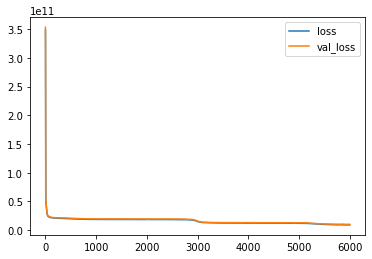

In [83]:
#plotting the losses
losses = pd.DataFrame(model.history.history)

losses.plot()

In [91]:
#Evaluating model performance
preds = model.predict(X_test)

print("MSE: ",mean_squared_error(y_test, preds))

print("RMSE: ",np.sqrt(mean_squared_error(y_test, preds)))

print("MAE: ",mean_absolute_error(y_test, preds))

print("Explained Variance Score ",explained_variance_score(y_test, preds))

MSE:  9292961327.038427
RMSE:  96400.00688297916
MAE:  63602.67653205378
Explained Variance Score  0.8898770707098143


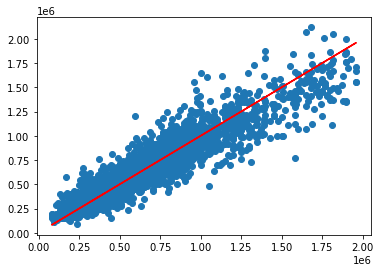

In [92]:
#predicted values vs actual values
plt.scatter(y_test, preds)
plt.plot(y_test,y_test, 'r')

In [93]:
#sample house
test_house = bottom_99_percent.drop('price', axis = 1).iloc[0]

test_house = scaler.transform(test_house.values.reshape(-1,19))

print("Predicted Value: ",model.predict(test_house)[0])
print("Actual Value: ", bottom_99_percent['price'].iloc[0])

Predicted Value:  [1556163.4]
Actual Value:  1970000.0


### We can see from the above that training our model after removing the ouliers and increasing the number of epochs has decresed our error and also made a better prediction.